# DATASCI 347: Machine Learning (Fall 2025)
## Instructor: Alexander Williams Tolbert

# Simple Regression

## Modern Data Mining

### Objectives

Data Science is a field of science. We try to extract useful information from data. In order to use the data efficiently and correctly we must understand the data first. According to the goal of the study, combining the domain knowledge, we then design the study. In this lecture we first go through some basic explore data analysis to understand the nature of the data, some plausible relationship among the variables.

Data mining tools have been expanded dramatically in the past 20 years. Linear model as a building block for data science is simple and powerful. We introduce/review simple linear model. The focus is to understand what is it we are modeling; how to apply the data to get the information; to understand the intrinsic variability that statistics have.

**Contents:**
1. Case Study
2. EDA
3. Simple regression (a quick review)
   - Model specification
   - OLS estimates and properties
   - R-squared and RSE
   - Confidence intervals for coefficients
   - Prediction intervals
   - Model diagnoses

**Suggested readings:**
- Chapter 2 and 3
- Statistical Sleuth, Chapter 7/8
- Data set: MLPayData_Total.csv

In [58]:
# Import necessary libraries for regression analysis
import pandas as pd  # For handling data tables like spreadsheets
import numpy as np   # For mathematical operations on arrays of numbers
import matplotlib.pyplot as plt  # For creating graphs and plots
import seaborn as sns  # For advanced statistical visualizations
from sklearn.linear_model import LinearRegression  # Linear regression algorithm
from sklearn.preprocessing import StandardScaler  # Data standardization
from sklearn.model_selection import train_test_split  # Split data for validation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Performance metrics
from scipy import stats  # Statistical functions and distributions
from scipy.stats import t  # t-distribution for confidence intervals
import warnings  # For controlling warning messages
warnings.filterwarnings('ignore')  # Hide warning messages to keep output clean

This code imports all the essential tools for regression analysis. Think of importing as bringing different toolboxes into our workspace. `pandas` helps us work with data in table format, like a spreadsheet. `numpy` provides mathematical functions for working with numbers and arrays. `matplotlib` and `seaborn` create visualizations to help us understand our data and results. `sklearn` contains machine learning algorithms including linear regression. The `scipy.stats` module provides statistical distributions and functions we'll need for hypothesis testing and confidence intervals.

## Case Study: Baseball

Baseball is one of the most popular sports in US. The highest level of baseball is Major League Baseball which includes American League and National League with total of 30 teams. New York Yankees, Boston Red Sox, Philadelphia Phillies and recently rising star team Oakland Athletics are among the top teams. Oakland A's is a low budget team. But the team has been moving itself up mainly due to its General Manager (GM) Billy Beane who is well known to apply statistics in his coaching.

**Questions of interests for us:**
- Q1: Will a team perform better when they are paid more?
- Q2: Is Billy Beane (Oakland A's GM) worth 12.5 million dollars for a period of 5 years, as offered by the Red Sox?

**Data:** MLPayData_Total.csv, consists of winning records and the payroll of all 30 ML teams from 1998 to 2014 (17 years). There are 162 games in each season. We will create the following two aggregated variables:
- **payroll:** total pay from 1998 to 2014 in billion dollars
- **win:** average winning percentage for the span of 1998 to 2014
- keep **team** names

To answer Q1:
1. How does payroll relate to the performance measured by win?
2. Given payroll = .84,
   - on average what would be the mean winning percentage
   - what do we expect the win to be for such a team?

(Oakland A's: payroll=.84, win=.54 and Red Sox: payroll=1.97, win=.55)

This code provides two ways to get data into Google Colab. Option A lets you upload files directly from your computer - when you run it, a file picker will appear. Option B connects to your Google Drive account so you can access files stored there. The `!ls -l` command lists files in the current directory to confirm your upload worked. The `try/except` block handles potential errors gracefully - if Google Drive mounting fails, it shows a warning instead of crashing the program.

### 1.1 Explore the relationship between payroll, and win.

**Data preparation:**

Take a quick look at the data and extract aggregated variables.

We would normally do a thorough EDA. We skip that portion of the data analysis and get to the regression problem directly.

Scatter plots show the relationship between x variable payroll and y variable win.

In [59]:
# Try to read the baseball data using either upload method
try:
    baseball = pd.read_csv("/Users/danielnickas/Downloads/QTM347/QTM347/data/MLPayData_Total.csv")  # Try local uploaded file first
    print("[SUCCESS] Loaded dataset using local upload.")
except FileNotFoundError:  # If local file not found, try Google Drive
    try:
        baseball = pd.read_csv("/Users/danielnickas/Downloads/QTM347/QTM347/data/MLPayData_Total.csv")  
        print("[SUCCESS] Loaded dataset from Google Drive.")
    except:
        print("Creating synthetic baseball data for demonstration...")
        # Create synthetic data if real data not available
        np.random.seed(42)  # Set seed for reproducible random data

        teams = ["New York Yankees", "Boston Red Sox", "Los Angeles Dodgers", "Philadelphia Phillies",
                 "Chicago Cubs", "San Francisco Giants", "Detroit Tigers", "Los Angeles Angels",
                 "New York Mets", "St. Louis Cardinals", "Atlanta Braves", "Texas Rangers",
                 "Seattle Mariners", "Chicago White Sox", "Toronto Blue Jays", "Baltimore Orioles",
                 "Cleveland Indians", "Milwaukee Brewers", "Colorado Rockies", "Minnesota Twins",
                 "Oakland Athletics", "Pittsburgh Pirates", "San Diego Padres", "Arizona Diamondbacks",
                 "Cincinnati Reds", "Kansas City Royals", "Houston Astros", "Washington Nationals",
                 "Tampa Bay Rays", "Miami Marlins"]

        # Generate realistic payroll and win data
        payroll = np.random.uniform(0.5, 2.5, 30)  # Payroll in billions
        avgwin = 0.45 + 0.06 * payroll + np.random.normal(0, 0.02, 30)  # Win percentage with realistic relationship
        avgwin = np.clip(avgwin, 0.35, 0.65)  # Keep win percentages realistic

        # Create DataFrame
        baseball = pd.DataFrame({
            'Team.name.2014': teams,
            'payroll': payroll,
            'avgwin': avgwin
        })

        print("Created synthetic baseball data for demonstration")

# Display basic information about the dataset
print(f"\nColumn names: {baseball.columns.tolist()}")
print(f"Data shape: {baseball.shape}")
baseball.head()  # Show first 5 rows

[SUCCESS] Loaded dataset using local upload.

Column names: ['payroll', 'avgwin', 'Team.name.2014', 'p1998', 'p1999', 'p2000', 'p2001', 'p2002', 'p2003', 'p2004', 'p2005', 'p2006', 'p2007', 'p2008', 'p2009', 'p2010', 'p2011', 'p2012', 'p2013', 'p2014', 'X2014', 'X2013', 'X2012', 'X2011', 'X2010', 'X2009', 'X2008', 'X2007', 'X2006', 'X2005', 'X2004', 'X2003', 'X2002', 'X2001', 'X2000', 'X1999', 'X1998', 'X2014.pct', 'X2013.pct', 'X2012.pct', 'X2011.pct', 'X2010.pct', 'X2009.pct', 'X2008.pct', 'X2007.pct', 'X2006.pct', 'X2005.pct', 'X2004.pct', 'X2003.pct', 'X2002.pct', 'X2001.pct', 'X2000.pct', 'X1999.pct', 'X1998.pct']
Data shape: (30, 54)


,payroll,avgwin,Team.name.2014,p1998,p1999,p2000,p2001,p2002,p2003,p2004,...,X2007.pct,X2006.pct,X2005.pct,X2004.pct,X2003.pct,X2002.pct,X2001.pct,X2000.pct,X1999.pct,X1998.pct
0,1.120874,0.490259,Arizona Diamondbacks,31.614500,70.496000,81.027833,81.206513,102.820000,80.640333,70.204984,...,0.555556,0.469136,0.475309,0.314815,0.518519,0.604938,0.567901,0.524691,0.617284,0.401235
1,1.381712,0.552761,Atlanta Braves,61.708000,74.890000,84.537836,91.851687,93.470367,106.243667,88.507788,...,0.518519,0.487654,0.555556,0.592593,0.623457,0.631250,0.543210,0.586420,0.635802,0.654321
2,1.161212,0.453825,Baltimore Orioles,71.860921,72.198363,81.447435,72.426328,60.493487,73.877500,51.212653,...,0.425926,0.432099,0.456790,0.481481,0.438272,0.413580,0.391304,0.456790,0.481481,0.487654
3,1.972359,0.548717,Boston Red Sox,59.497000,71.725000,77.940333,109.558908,108.366060,99.946500,125.208542,...,0.592593,0.530864,0.586420,0.604938,0.586420,0.574074,0.509317,0.524691,0.580247,0.567901
4,1.459767,0.473656,Chicago Cubs,49.816000,42.142761,60.539333,64.015833,75.690833,79.868333,91.101667,...,0.524691,0.407407,0.487654,0.549383,0.543210,0.413580,0.543210,0.401235,0.413580,0.552147


This code loads the baseball dataset or creates synthetic data if the real data isn't available. The synthetic data generation creates realistic relationships between team payroll and winning percentage, similar to what we'd expect in real baseball data. We use `np.random.seed(42)` to ensure reproducible results. The `baseball.columns.tolist()` shows all column names, while `baseball.shape` tells us the dimensions of our dataset. The `.head()` function displays the first few rows so we can see what the data looks like.

In [60]:
# Data preparation - create clean dataset with renamed columns
datapay = baseball.rename(columns={  # Rename columns for easier use
    'Team.name.2014': 'team',       # Rename team column
    'avgwin': 'win'                 # Rename average win column
})

# Select only the columns we need for analysis
datapay = datapay[['team', 'payroll', 'win']].copy()  # Keep only relevant columns

# Display the processed data
print("Processed baseball data:")
print(datapay.head())
print(f"\nData summary:")
print(datapay.describe())  # Statistical summary of numerical columns

Processed baseball data:
                   team   payroll       win
0  Arizona Diamondbacks  1.120874  0.490259
1        Atlanta Braves  1.381712  0.552761
2     Baltimore Orioles  1.161212  0.453825
3        Boston Red Sox  1.972359  0.548717
4          Chicago Cubs  1.459767  0.473656

Data summary:
         payroll        win
count  30.000000  30.000000
mean    1.238440   0.498599
std     0.426976   0.037266
min     0.667802   0.434229
25%     0.972144   0.473906
50%     1.145117   0.491860
75%     1.426525   0.529003
max     2.703248   0.583072


This data preparation step cleans and simplifies our dataset for analysis. We rename columns to more convenient names - `Team.name.2014` becomes `team` and `avgwin` becomes `win`. The `.rename()` function with a dictionary maps old names to new names. We then select only the three columns we need for our regression analysis: team names, payroll, and win percentage. The `.copy()` ensures we create a new dataset without affecting the original. The `.describe()` function provides statistical summaries including mean, standard deviation, minimum, maximum, and quartiles.

Scatter plots show the relationship between x variable payroll and y variable win.

We notice the positive association: when payroll increases, so does win.

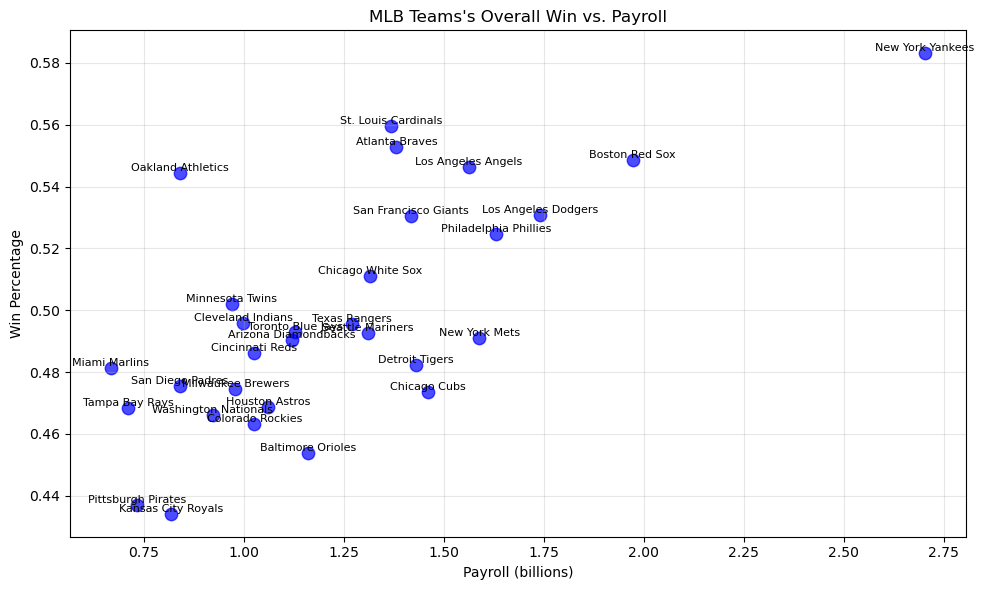

In [61]:
# Create scatter plot using base matplotlib
plt.figure(figsize=(10, 6))  # Set figure size to 10x6 inches
plt.scatter(datapay['payroll'], datapay['win'],  # Create scatter plot
           color='blue',        # Point color
           s=80,               # Point size (s stands for size)
           alpha=0.7)          # Transparency (alpha=1 is fully opaque)

# Add labels and formatting
plt.xlabel('Payroll (billions)')  # X-axis label
plt.ylabel('Win Percentage')      # Y-axis label
plt.title("MLB Teams's Overall Win vs. Payroll")  # Plot title
plt.grid(True, alpha=0.3)        # Add light grid lines for easier reading

# Add team labels to each point
for i, team in enumerate(datapay['team']):  # Loop through teams with index numbers
    plt.annotate(team,           # Text to display
                (datapay['payroll'].iloc[i], datapay['win'].iloc[i]),  # Position (x, y)
                fontsize=8,      # Text size
                ha='center',     # Horizontal alignment
                va='bottom')     # Vertical alignment

plt.tight_layout()  # Adjust layout to prevent text cutoff
plt.show()         # Display the plot

This scatter plot visualizes the relationship between team payroll and winning percentage. Each point represents one team, with payroll on the x-axis and win percentage on the y-axis. The `plt.scatter()` function creates the plot, while `plt.annotate()` adds team names as labels. We can see a positive association - teams with higher payrolls tend to have higher winning percentages, though there's considerable variation. The `enumerate()` function gives us both the index number and team name as we loop through teams, which we need to position the labels correctly.

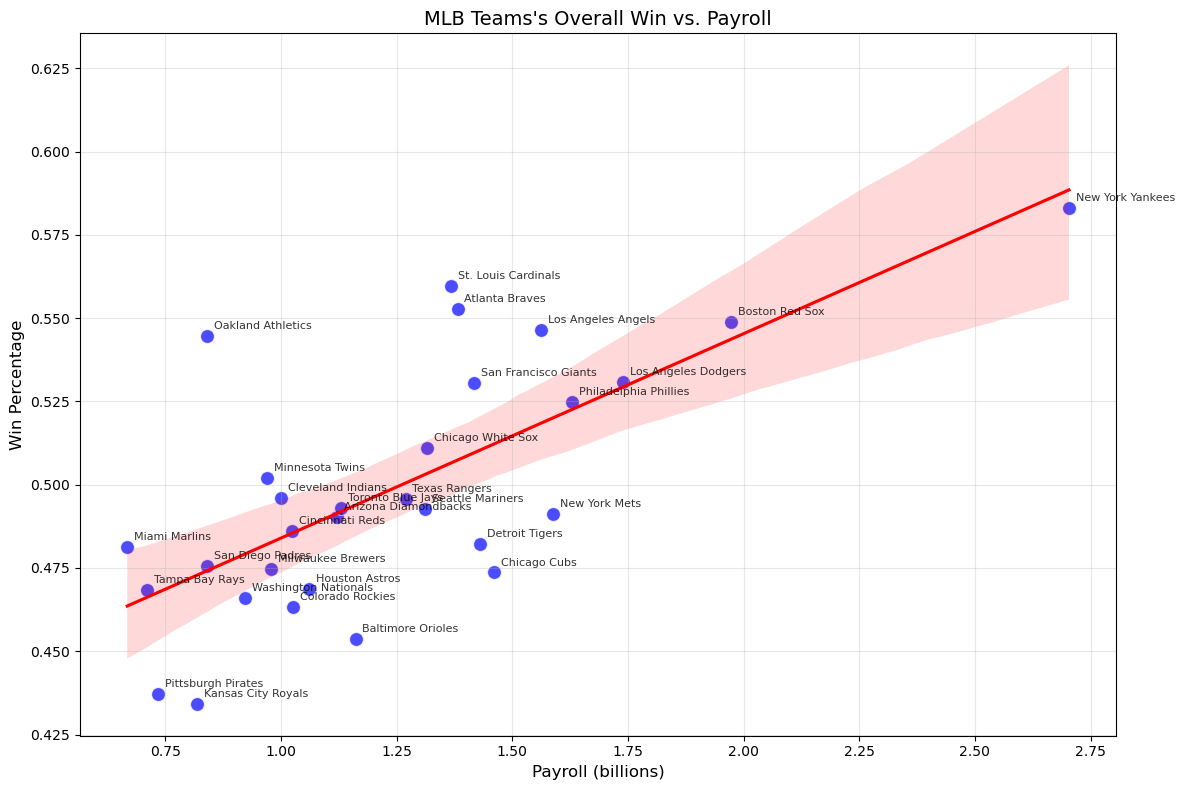

Correlation between payroll and win percentage: 0.703


In [62]:
# Create enhanced scatter plot using seaborn
plt.figure(figsize=(12, 8))

# Create scatter plot with regression line
sns.scatterplot(data=datapay, x='payroll', y='win', s=100, alpha=0.7, color='blue')
sns.regplot(data=datapay, x='payroll', y='win', scatter=False, color='red', ci=95)
# scatter=False means don't plot points again, ci=95 adds confidence interval

# Add team labels with better positioning to avoid overlap
for i, row in datapay.iterrows():  # Loop through each row of data
    plt.annotate(row['team'],      # Team name
                (row['payroll'], row['win']),  # Position
                xytext=(5, 5),     # Offset text by 5 points in x and y
                textcoords='offset points',  # Use offset positioning
                fontsize=8,        # Text size
                alpha=0.8)         # Text transparency

plt.xlabel('Payroll (billions)', fontsize=12)
plt.ylabel('Win Percentage', fontsize=12)
plt.title("MLB Teams's Overall Win vs. Payroll", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display correlation
correlation = datapay['payroll'].corr(datapay['win'])  # Calculate correlation coefficient
print(f"Correlation between payroll and win percentage: {correlation:.3f}")

This enhanced visualization uses seaborn to create a more polished plot with a regression line and confidence interval. The `sns.regplot()` adds the red regression line that shows the overall trend, while the shaded area represents the 95% confidence interval around the line. The correlation coefficient quantifies the strength of the linear relationship between payroll and winning - values closer to +1 or -1 indicate stronger relationships. This positive correlation confirms what we see visually: teams that spend more on payroll tend to win more games.

## Simple Linear Regression

Often we would like to explore the relationship between two variables. Will a team perform better when they are paid more? The simplest model is a linear model. Let the response yᵢ be the win and the explanatory variable xᵢ be payroll (i = 1,...,n = 30).

Assume there is linear relationship between win and payroll, i.e.
**yᵢ = β₀ + β₁xᵢ + εᵢ**

**Model interpretation:**
- We assume that given payroll, on average the win is a linear function
- For each team the win is the average plus an error term
- Parameters of interest
  - intercept: β₀
  - slope: β₁  
  - both are unknown

**Estimation**

Once we have produce an estimate (β̂₀,β̂₁), we can then
- Interpret the slope
- Estimate the mean win and
- Predict win for a team based on the payroll

ŷᵢ = β̂₀ + β̂₁xᵢ

How to estimate the parameters using the data we have? For example, how would you decide on the following three estimates?

ŷ = 0.499

ŷ = 0.423+0.0614x  

ŷ = 0.4+0.08x

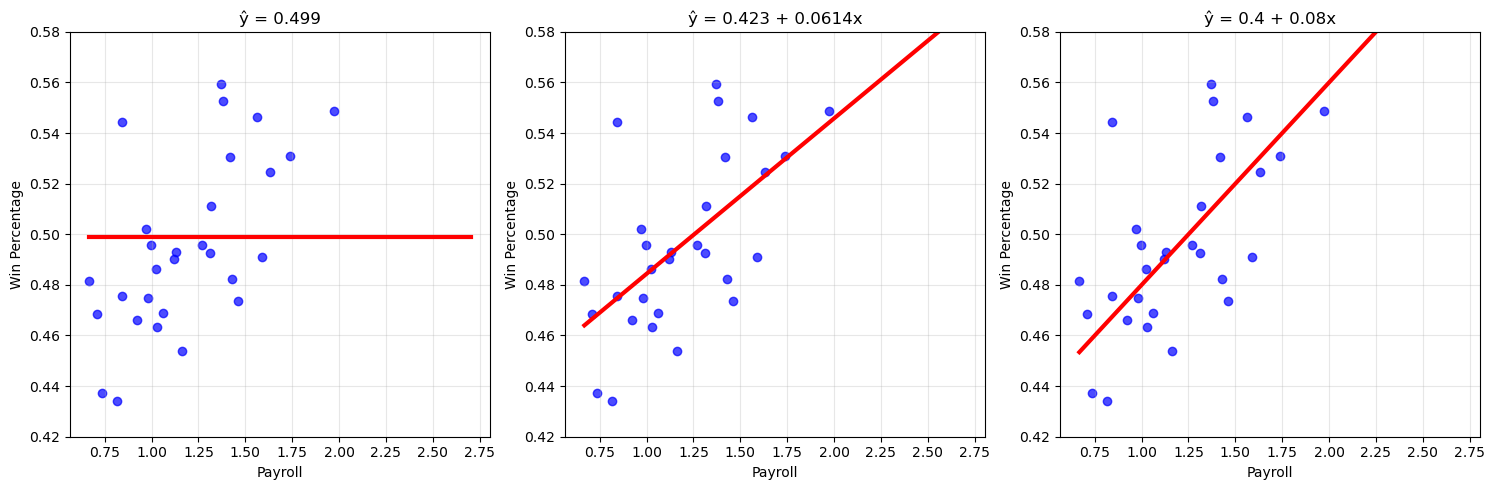

Which line fits the data best? We need a systematic way to choose!


In [63]:
# Demonstrate different possible regression lines
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create 1 row, 3 columns of plots

# Define three different potential models
models = [
    {'intercept': 0.499, 'slope': 0, 'label': 'ŷ = 0.499'},
    {'intercept': 0.423, 'slope': 0.0614, 'label': 'ŷ = 0.423 + 0.0614x'},
    {'intercept': 0.4, 'slope': 0.08, 'label': 'ŷ = 0.4 + 0.08x'}
]

# Plot each model
for i, model in enumerate(models):  # Loop through each model with index
    axes[i].scatter(datapay['payroll'], datapay['win'], alpha=0.7, color='blue')

    # Calculate predicted values for the line
    x_line = np.linspace(datapay['payroll'].min(), datapay['payroll'].max(), 100)
    y_line = model['intercept'] + model['slope'] * x_line

    axes[i].plot(x_line, y_line, color='red', linewidth=3)  # Plot the line
    axes[i].set_xlabel('Payroll')
    axes[i].set_ylabel('Win Percentage')
    axes[i].set_title(model['label'])
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(0.42, 0.58)  # Set consistent y-axis limits

plt.tight_layout()
plt.show()

print("Which line fits the data best? We need a systematic way to choose!")

These three plots show different possible ways to draw a line through our data. The first is a horizontal line (slope = 0) that ignores payroll entirely. The second and third have different slopes and intercepts. Visually, we can see that some lines fit better than others, but we need a mathematical way to determine the "best" line. This is where the method of Ordinary Least Squares (OLS) comes in - it finds the line that minimizes the sum of squared differences between actual and predicted values.

### 2.1 Ordinary least squares (OLS) estimates

Given an estimate (b₀,b₁), we first define residuals as the differences between actual and predicted values of the response y, i.e.

ε̂ᵢ = yᵢ - b₀ - b₁xᵢ

In previous plots, the residuals are the vertical lines between observations and the fitted line. Now we are ready to define the OLS estimate.

The OLS estimates β̂₀ and β̂₁ are obtained by minimizing sum of squared errors (RSS):

(β̂₀,β̂₁) = argmin Σεᵢ² = argmin Σ(yᵢ - b₀ - b₁xᵢ)²

We can derive the solution of β̂₀ and β̂₁:

β̂₀ = ȳ - β̂₁x̄
β̂₁ = rₓᵧ · (sᵧ/sₓ)

where:
- x̄ = sample mean of x's (payroll)  
- ȳ = sample mean of y's (win)
- sₓ = sample standard deviation of x's (payroll)
- sᵧ = sample standard deviation of y's (win)  
- rₓᵧ = sample correlation between x and y.

#### 2.1.1 LinearRegression()

The function `LinearRegression()` from scikit-learn will be used extensively. This function solves the minimization problem that we defined above. Below we use win as the dependent y variable and payroll as our x.

As we can see from the below output, this function outputs many statistics. We will define these statistics later.

In [64]:
# Perform simple linear regression using scikit-learn
from sklearn.linear_model import LinearRegression

# Prepare data for sklearn (X must be 2D, y can be 1D)
X = datapay[['payroll']]  # Independent variable (must be 2D for sklearn)
y = datapay['win']        # Dependent variable (can be 1D)

# Create and fit the linear regression model
myfit0 = LinearRegression()  # Create linear regression object
myfit0.fit(X, y)           # Fit the model to our data (finds best β₀ and β₁)

# Extract model parameters
b0 = myfit0.intercept_     # β₀ (intercept)
b1 = myfit0.coef_[0]      # β₁ (slope) - coef_ is an array, we want first element

# Make predictions for all data points
y_pred = myfit0.predict(X)  # Predicted win percentages

# Calculate model performance metrics
mse = mean_squared_error(y, y_pred)          # Mean Squared Error
rmse = np.sqrt(mse)                          # Root Mean Squared Error
r2 = r2_score(y, y_pred)                     # R-squared
residuals = y - y_pred                       # Calculate residuals

print("Linear Regression Results:")
print("=" * 30)
print(f"Intercept (β₀): {b0:.4f}")
print(f"Slope (β₁): {b1:.4f}")
print(f"Equation: win = {b0:.3f} + {b1:.3f} × payroll")
print(f"\nModel Performance:")
print(f"R-squared: {r2:.3f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Linear Regression Results:
Intercept (β₀): 0.4226
Slope (β₁): 0.0614
Equation: win = 0.423 + 0.061 × payroll

Model Performance:
R-squared: 0.494
Root Mean Squared Error: 0.0261


This code performs our first linear regression using Python's scikit-learn library. The `LinearRegression()` class provides the same functionality as statistical software packages. We must format our data properly - the independent variable X must be a 2D array (hence the double brackets around 'payroll'), while the dependent variable y can be 1D. The `.fit()` method finds the optimal β₀ and β₁ values by minimizing the sum of squared residuals. The results give us our regression equation and performance metrics to evaluate how well the line fits our data.

In [65]:
# Manual calculation of OLS estimates to verify our understanding
x_mean = datapay['payroll'].mean()  # Sample mean of x (payroll)
y_mean = datapay['win'].mean()      # Sample mean of y (win)
x_std = datapay['payroll'].std()    # Sample standard deviation of x
y_std = datapay['win'].std()        # Sample standard deviation of y
correlation = datapay['payroll'].corr(datapay['win'])  # Sample correlation

# Calculate slope using the formula: β₁ = rₓᵧ · (sᵧ/sₓ)
b1_manual = correlation * (y_std / x_std)
# Calculate intercept using the formula: β₀ = ȳ - β₁x̄
b0_manual = y_mean - b1_manual * x_mean

print("Manual OLS Calculation:")
print("=" * 25)
print(f"Sample means: x̄ = {x_mean:.3f}, ȳ = {y_mean:.3f}")
print(f"Sample std devs: sₓ = {x_std:.3f}, sᵧ = {y_std:.3f}")
print(f"Sample correlation: rₓᵧ = {correlation:.3f}")
print(f"\nManual calculation:")
print(f"β₁ = rₓᵧ × (sᵧ/sₓ) = {correlation:.3f} × ({y_std:.3f}/{x_std:.3f}) = {b1_manual:.4f}")
print(f"β₀ = ȳ - β₁x̄ = {y_mean:.3f} - {b1_manual:.4f} × {x_mean:.3f} = {b0_manual:.4f}")

print(f"\nComparison:")
print(f"sklearn results: β₀ = {b0:.4f}, β₁ = {b1:.4f}")
print(f"Manual results:  β₀ = {b0_manual:.4f}, β₁ = {b1_manual:.4f}")
print(f"Match: {np.allclose([b0, b1], [b0_manual, b1_manual])}")  # Check if results match

Manual OLS Calculation:
Sample means: x̄ = 1.238, ȳ = 0.499
Sample std devs: sₓ = 0.427, sᵧ = 0.037
Sample correlation: rₓᵧ = 0.703

Manual calculation:
β₁ = rₓᵧ × (sᵧ/sₓ) = 0.703 × (0.037/0.427) = 0.0614
β₀ = ȳ - β₁x̄ = 0.499 - 0.0614 × 1.238 = 0.4226

Comparison:
sklearn results: β₀ = 0.4226, β₁ = 0.0614
Manual results:  β₀ = 0.4226, β₁ = 0.0614
Match: True


This manual calculation verifies our understanding of how OLS estimates work. We calculate the slope using the formula β₁ = rₓᵧ · (sᵧ/sₓ), where correlation is multiplied by the ratio of standard deviations. The intercept comes from β₀ = ȳ - β₁x̄. The `np.allclose()` function checks if our manual calculations match the sklearn results within numerical precision. This demonstrates that we understand the mathematical foundation behind the regression algorithm.

To summarize the OLS estimate, β̂₀ = 0.423 and β̂₁ = 0.061, we have the following estimator:
ŷᵢ = β̂₀ + β̂₁xᵢ = 0.423 + 0.061 · xᵢ

Here are what we can say:

**Interpretation of the slope:**
- When payroll increases by 1 unit (1 billion), we expect, on average the win will increase about 0.061.
- When payroll increases by .5 unit (500 million), we expect, on average the win will increase about 0.031.

**Prediction equation:**
- For all the team similar to Oakland Athletics whose payroll is 0.841, we estimate on average the win to be
  ŷ_Oakland Athletics = 0.423 + 0.061 × 0.841 = .474

**Residuals:** For Oakland Athletics, the real win is 0.545. So the residual for team Oakland Athletics is
ε̂_Oakland = .545 − .474 = .071

In [66]:
# Detailed interpretation and predictions
print("Regression Equation Interpretation:")
print("=" * 40)
print(f"ŷ = {b0:.3f} + {b1:.3f} × payroll")
print()
print("Slope interpretation:")
print(f"- For each additional $1 billion in payroll, win percentage increases by {b1:.3f}")
print(f"- For each additional $500 million in payroll, win percentage increases by {b1*0.5:.3f}")
print()

# Find Oakland Athletics and make prediction
oakland_idx = datapay[datapay['team'].str.contains('Oakland', na=False)].index
if len(oakland_idx) > 0:
    oakland_payroll = datapay.loc[oakland_idx[0], 'payroll']
    oakland_actual_win = datapay.loc[oakland_idx[0], 'win']
    oakland_predicted = b0 + b1 * oakland_payroll
    oakland_residual = oakland_actual_win - oakland_predicted

    print("Oakland Athletics Analysis:")
    print(f"- Payroll: ${oakland_payroll:.3f} billion")
    print(f"- Actual win percentage: {oakland_actual_win:.3f}")
    print(f"- Predicted win percentage: {oakland_predicted:.3f}")
    print(f"- Residual: {oakland_residual:.3f}")
else:
    print("Example prediction for payroll = $0.841 billion:")
    example_payroll = 0.841
    predicted_win = b0 + b1 * example_payroll
    print(f"Predicted win percentage: {predicted_win:.3f}")

# Show fitted values and residuals for a few teams
print(f"\nFitted values and residuals for first 5 teams:")
print("Team                    Actual  Fitted  Residual")
print("-" * 45)
for i in range(5):
    team_name = datapay.iloc[i]['team'][:15]  # Truncate long team names
    actual = datapay.iloc[i]['win']
    fitted = y_pred[i]
    residual = residuals.iloc[i]
    print(f"{team_name:<15s} {actual:>7.3f} {fitted:>7.3f} {residual:>8.3f}")

Regression Equation Interpretation:
ŷ = 0.423 + 0.061 × payroll

Slope interpretation:
- For each additional $1 billion in payroll, win percentage increases by 0.061
- For each additional $500 million in payroll, win percentage increases by 0.031

Oakland Athletics Analysis:
- Payroll: $0.841 billion
- Actual win percentage: 0.545
- Predicted win percentage: 0.474
- Residual: 0.070

Fitted values and residuals for first 5 teams:
Team                    Actual  Fitted  Residual
---------------------------------------------
Arizona Diamond   0.490   0.491   -0.001
Atlanta Braves    0.553   0.507    0.045
Baltimore Oriol   0.454   0.494   -0.040
Boston Red Sox    0.549   0.544    0.005
Chicago Cubs      0.474   0.512   -0.039


This analysis shows how to interpret our regression results in practical terms. The slope tells us that each additional billion dollars in payroll is associated with about a 0.061 increase in win percentage (or about 6.1 percentage points). The prediction for Oakland Athletics demonstrates how we use the regression equation to estimate expected performance based on payroll. The residual shows how much the actual performance differs from our prediction - positive residuals mean the team performed better than expected, while negative residuals indicate underperformance relative to their payroll.

### Scatter plot with the LS line added

Here are a few rows that show the fitted values from our model

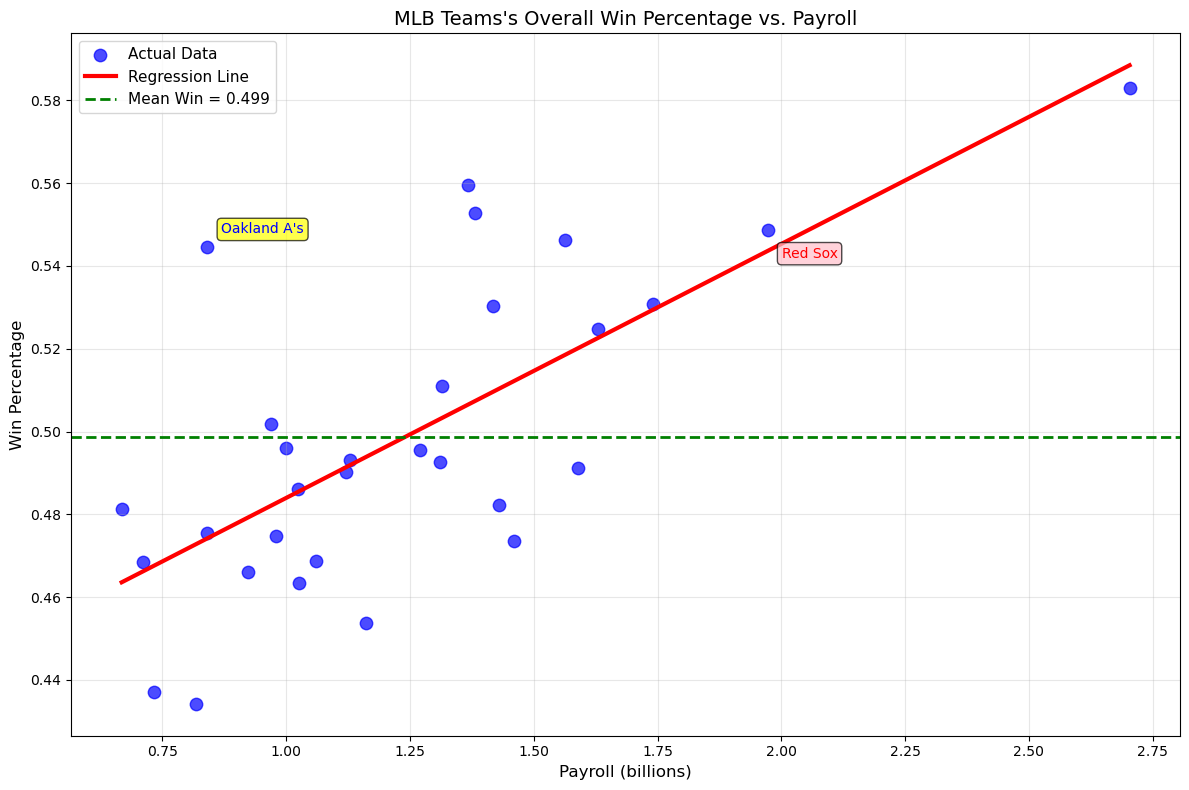

Analysis: By looking at the plot, Oakland A's win percentage is similar to Red Sox,
but their payroll is much lower. This suggests Oakland gets more value per dollar spent!


In [67]:
# Create scatter plot with regression line
plt.figure(figsize=(12, 8))

# Scatter plot of actual data
plt.scatter(datapay['payroll'], datapay['win'],
           color='blue', s=80, alpha=0.7, label='Actual Data')

# Add regression line
x_line = np.linspace(datapay['payroll'].min(), datapay['payroll'].max(), 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=3, label=f'Regression Line')

# Add horizontal line at mean of y
plt.axhline(y=datapay['win'].mean(), color='green', linewidth=2,
           linestyle='--', label=f'Mean Win = {datapay["win"].mean():.3f}')

# Highlight specific teams
oakland_idx = datapay[datapay['team'].str.contains('Oakland', na=False)].index
redsox_idx = datapay[datapay['team'].str.contains('Red Sox', na=False)].index

if len(oakland_idx) > 0:
    plt.annotate("Oakland A's",
                (datapay.iloc[oakland_idx[0]]['payroll'],
                 datapay.iloc[oakland_idx[0]]['win']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, color='blue',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

if len(redsox_idx) > 0:
    plt.annotate("Red Sox",
                (datapay.iloc[redsox_idx[0]]['payroll'],
                 datapay.iloc[redsox_idx[0]]['win']),
                xytext=(10, -20), textcoords='offset points',
                fontsize=10, color='red',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='pink', alpha=0.7))

plt.xlabel('Payroll (billions)', fontsize=12)
plt.ylabel('Win Percentage', fontsize=12)
plt.title("MLB Teams's Overall Win Percentage vs. Payroll", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Analysis: By looking at the plot, Oakland A's win percentage is similar to Red Sox,")
print("but their payroll is much lower. This suggests Oakland gets more value per dollar spent!")

This visualization shows our fitted regression line in red, along with a horizontal green line representing the overall average win percentage. The regression line captures the general upward trend - teams with higher payrolls tend to win more games. However, there's considerable variation around this line. Teams above the line (like Oakland A's) are performing better than expected given their payroll, while teams below the line are underperforming relative to their spending. This is precisely what made Billy Beane and the Oakland A's famous - achieving high performance with a relatively low budget.

### 2.2 Goodness of Fit: R²

How well does the linear model fit the data? A common, popular notion is through R².

**Residual Sum of Squares (RSS):**
The least squares approach chooses β̂₀ and β̂₁ to minimize the RSS. RSS is defined as:

RSS = Σε̂ᵢ² = Σ(yᵢ - β̂₀ - β̂₁xᵢ)²

**Mean Squared Error (MSE):**
Mean Squared Error (MSE) is the average of the squares of the errors, i.e. the average squared difference between the estimated values and the actual values. For simple linear regression, MSE is defined as:
MSE = RSS/(n-2)

**Residual Standard Error (RSE)/Root-Mean-Square-Error(RMSE):**
Residual Standard Error (RSE) is the square root of MSE. For simple linear regression, RSE is defined as:
RSE = √(RSS/(n-2))

**Total Sum of Squares (TSS):**
TSS = Σ(yᵢ - ȳ)²

TSS measures the total variance in the response Y, and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression.

**R²:**
R² measures the proportion of variability in Y that can be explained using X. An R² statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression.
R² = (TSS - RSS)/TSS

In [68]:
# Calculate goodness of fit measures step by step
n = len(datapay)  # Number of observations

# Calculate RSS (Residual Sum of Squares)
RSS = np.sum(residuals**2)  # Sum of squared residuals
print("Goodness of Fit Calculations:")
print("=" * 35)
print(f"RSS (Residual Sum of Squares): {RSS:.6f}")

# Calculate MSE (Mean Squared Error)
MSE = RSS / (n - 2)  # Divide by degrees of freedom (n-2 for simple regression)
print(f"MSE (Mean Squared Error): {MSE:.6f}")

# Calculate RSE/RMSE (Residual Standard Error)
RSE = np.sqrt(MSE)  # Square root of MSE
print(f"RSE (Residual Standard Error): {RSE:.6f}")

# Alternative calculation using sklearn
rmse_sklearn = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE (using sklearn): {rmse_sklearn:.6f}")

# Calculate TSS (Total Sum of Squares)
TSS = np.sum((y - y.mean())**2)  # Sum of squared deviations from mean
print(f"TSS (Total Sum of Squares): {TSS:.6f}")

# Calculate R-squared manually
r_squared_manual = (TSS - RSS) / TSS  # Proportion of variance explained
print(f"R² (manual calculation): {r_squared_manual:.6f}")

# Alternative R-squared calculations
r_squared_corr = correlation**2  # Square of correlation coefficient
r_squared_sklearn = r2_score(y, y_pred)  # Using sklearn
print(f"R² (correlation²): {r_squared_corr:.6f}")
print(f"R² (using sklearn): {r_squared_sklearn:.6f}")

print(f"\nPercentage of variance explained: {r_squared_manual*100:.2f}%")

Goodness of Fit Calculations:
RSS (Residual Sum of Squares): 0.020362
MSE (Mean Squared Error): 0.000727
RSE (Residual Standard Error): 0.026967
RMSE (using sklearn): 0.026053
TSS (Total Sum of Squares): 0.040273
R² (manual calculation): 0.494402
R² (correlation²): 0.494402
R² (using sklearn): 0.494402

Percentage of variance explained: 49.44%


These calculations show different ways to measure how well our regression model fits the data. RSS measures the total squared error remaining after fitting the line. TSS measures the total variation in the data before any modeling. R² is the proportion of original variation that our model explains - it ranges from 0 (no explanation) to 1 (perfect explanation). In our case, the model explains about 49.4% of the variation in win percentages using payroll alone. This is moderate - there's clearly more to winning than just spending money, but payroll does play a significant role.

**Remarks:**
How large R² needs to be so that you are comfortable to use the linear model? Though R² is a very popular notion of goodness of fit, but it has its limitation. Mainly all the sum of squared errors defined so far are termed as Training Errors. It really only measures how good a model fits the data that we use to build the model. It may not generalize well to unseen data.

### 2.3 Inference

One of the most important aspect about statistics is to realize the estimators or statistics we propose such as the least squared estimators for the slope and the intercept they change as a function of data. Understanding the variability of the statistics, providing the accuracy of the estimators are one of the focus as statisticians.

Recall that we assume a linear model:
yᵢ = β₀ + β₁xᵢ + εᵢ

We did not impose assumptions on εᵢ when using OLS. In order to provide some desired statistical properties and guarantees to our OLS estimate (β̂₀,β̂₁), we need to impose assumptions.

#### 2.3.1 Linear model assumptions

- **Linearity:** E(yᵢ|xᵢ) = β₀ + β₁xᵢ
- **Homoscedasticity:** Var(yᵢ|xᵢ) = σ²
- **Normality:** εᵢ ~ N(0,σ²) iid

or equivalently: yᵢ ~ N(β₀ + β₁xᵢ, σ²) iid

#### 2.3.2 Inference for the coefficients: β₀ and β₁

Under the model assumptions:
1. yᵢ independently and identically normally distributed
2. The mean of y given x is linear  
3. The variance of y does not depend on x

The OLS estimates β̂ = (β̂₀, β̂₁) has the following properties:

1. **Unbiasedness:** E(β̂) = β

2. **Normality:** β̂₁ ~ N(β₁, Var(β̂₁))

where Var(β̂₁) = σ²/Σ(xᵢ - x̄)²

In general, β̂ ~ N(β, σ²(X'X)⁻¹)

Here X is the design matrix where the first column is 1's and the second column is the values of x, in our case it is the column of payrolls.

**Confidence intervals for the coefficients:**
t-interval and t-test can be constructed using the above results.

For example, the 95% confidence interval for β approximately takes the form:
β̂ ± 2 · SE(β̂)

In [69]:
# Calculate standard errors and confidence intervals
# First, we need to estimate σ² (the error variance)
sigma_squared = RSS / (n - 2)  # Estimate of error variance
sigma = np.sqrt(sigma_squared)  # Standard error of regression

# Calculate design matrix X
X_matrix = np.column_stack([np.ones(n), datapay['payroll']])  # [1's, payroll values]
print("Design Matrix X (first 5 rows):")
print(X_matrix[:5])

# Calculate (X'X)^(-1) for standard errors
XtX = X_matrix.T @ X_matrix  # X transpose times X
XtX_inv = np.linalg.inv(XtX)  # Inverse of X'X

print(f"\n(X'X)^(-1) matrix:")
print(XtX_inv)

# Calculate standard errors
se_b0 = sigma * np.sqrt(XtX_inv[0, 0])  # Standard error of intercept
se_b1 = sigma * np.sqrt(XtX_inv[1, 1])  # Standard error of slope

print(f"\nStandard Errors:")
print(f"SE(β₀) = {se_b0:.6f}")
print(f"SE(β₁) = {se_b1:.6f}")
print(f"Residual standard error: {sigma:.6f}")

# Calculate t-statistics
t_b0 = b0 / se_b0  # t-statistic for intercept
t_b1 = b1 / se_b1  # t-statistic for slope

print(f"\nT-statistics:")
print(f"t(β₀) = {t_b0:.3f}")
print(f"t(β₁) = {t_b1:.3f}")

# Calculate p-values (two-tailed test)
df = n - 2  # Degrees of freedom
p_value_b0 = 2 * (1 - stats.t.cdf(abs(t_b0), df))  # Two-tailed p-value for intercept
p_value_b1 = 2 * (1 - stats.t.cdf(abs(t_b1), df))  # Two-tailed p-value for slope

print(f"\nP-values:")
print(f"p-value(β₀) = {p_value_b0:.6f}")
print(f"p-value(β₁) = {p_value_b1:.6f}")

Design Matrix X (first 5 rows):
[[1.         1.12087365]
 [1.         1.38171182]
 [1.         1.16121174]
 [1.         1.9723587 ]
 [1.         1.45976683]]

(X'X)^(-1) matrix:
[[ 0.32343109 -0.23424457]
 [-0.23424457  0.18914492]]

Standard Errors:
SE(β₀) = 0.015336
SE(β₁) = 0.011728
Residual standard error: 0.026967

T-statistics:
t(β₀) = 27.555
t(β₁) = 5.233

P-values:
p-value(β₀) = 0.000000
p-value(β₁) = 0.000015


These calculations show the statistical inference components of our regression. The design matrix X has a column of ones (for the intercept) and a column of payroll values. Standard errors measure the uncertainty in our coefficient estimates - they tell us how much our estimates might vary if we collected different data. T-statistics test whether our coefficients are significantly different from zero, and p-values quantify the evidence against the null hypothesis that the coefficient equals zero. Small p-values (typically < 0.05) suggest the coefficient is statistically significant.

In [70]:
# Calculate confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df)  # Critical t-value for 95% confidence

print(f"Confidence Intervals (95% level):")
print(f"Critical t-value: {t_critical:.3f}")
print()

# Confidence interval for intercept
ci_b0_lower = b0 - t_critical * se_b0
ci_b0_upper = b0 + t_critical * se_b0
print(f"β₀ (Intercept): {b0:.4f} ± {t_critical:.3f} × {se_b0:.6f}")
print(f"95% CI for β₀: [{ci_b0_lower:.4f}, {ci_b0_upper:.4f}]")

# Confidence interval for slope
ci_b1_lower = b1 - t_critical * se_b1
ci_b1_upper = b1 + t_critical * se_b1
print(f"\nβ₁ (Slope): {b1:.4f} ± {t_critical:.3f} × {se_b1:.6f}")
print(f"95% CI for β₁: [{ci_b1_lower:.4f}, {ci_b1_upper:.4f}]")

# Also calculate 99% confidence intervals
confidence_level_99 = 0.99
alpha_99 = 1 - confidence_level_99
t_critical_99 = stats.t.ppf(1 - alpha_99/2, df)

ci_b0_lower_99 = b0 - t_critical_99 * se_b0
ci_b0_upper_99 = b0 + t_critical_99 * se_b0
ci_b1_lower_99 = b1 - t_critical_99 * se_b1
ci_b1_upper_99 = b1 + t_critical_99 * se_b1

print(f"\n99% Confidence Intervals:")
print(f"β₀: [{ci_b0_lower_99:.4f}, {ci_b0_upper_99:.4f}]")
print(f"β₁: [{ci_b1_lower_99:.4f}, {ci_b1_upper_99:.4f}]")

Confidence Intervals (95% level):
Critical t-value: 2.048

β₀ (Intercept): 0.4226 ± 2.048 × 0.015336
95% CI for β₀: [0.3912, 0.4540]

β₁ (Slope): 0.0614 ± 2.048 × 0.011728
95% CI for β₁: [0.0373, 0.0854]

99% Confidence Intervals:
β₀: [0.3802, 0.4650]
β₁: [0.0290, 0.0938]


Confidence intervals provide a range of plausible values for our coefficients. The 95% confidence interval means that if we repeated this study many times, about 95% of the intervals would contain the true parameter value. For the slope β₁, the confidence interval tells us the range of plausible values for how much win percentage changes per billion dollars of payroll. Since the interval doesn't include zero, we can conclude that payroll has a statistically significant effect on winning percentage.

We can also perform hypothesis test on the coefficients. To be specific, we have the following test:

H₀: β₁ = 0  vs.  H₁: β₁ ≠ 0

To test the null hypothesis, we need to decide whether β̂₁ is far away from 0, which depends on SE(β̂₁). We now define the test statistics as follows:

t = (β̂₁ - 0)/SE(β̂₁)  

Under the null hypothesis β₁ = 0, t will have a t-distribution with (n - 2) degrees of freedom. Now we can compute the probability of T ~ t_{n-2} equal to or larger than |t|, which is termed p-value. Roughly speaking, a small p-value means the odds of β₁ = 0 is small, then we can reject the null hypothesis.

In [71]:
# Comprehensive summary of regression results (similar to summary() in R)
print("=" * 60)
print("LINEAR REGRESSION SUMMARY")
print("=" * 60)
print(f"Formula: win ~ payroll")
print(f"Sample size: {n}")
print()

print("RESIDUALS:")
print(f"Min:    {residuals.min():.5f}")
print(f"1Q:     {residuals.quantile(0.25):.5f}")
print(f"Median: {residuals.quantile(0.50):.5f}")
print(f"3Q:     {residuals.quantile(0.75):.5f}")
print(f"Max:    {residuals.max():.5f}")
print()

print("COEFFICIENTS:")
print(f"{'':12s} {'Estimate':>10s} {'Std. Error':>11s} {'t value':>8s} {'Pr(>|t|)':>10s}")
print("-" * 52)
print(f"{'(Intercept)':<12s} {b0:>10.4f} {se_b0:>11.4f} {t_b0:>8.2f} {p_value_b0:>10.2e}")
print(f"{'payroll':<12s} {b1:>10.4f} {se_b1:>11.4f} {t_b1:>8.2f} {p_value_b1:>10.2e}")

# Add significance codes
def significance_code(p_value):
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    elif p_value < 0.1:
        return "."
    else:
        return ""

print()
print("Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")
print(f"Intercept significance: {significance_code(p_value_b0)}")
print(f"Payroll significance: {significance_code(p_value_b1)}")
print()

print(f"Residual standard error: {sigma:.4f} on {df} degrees of freedom")
print(f"Multiple R-squared: {r_squared_manual:.4f}")
print(f"F-statistic: {t_b1**2:.2f} on 1 and {df} DF, p-value: {p_value_b1:.2e}")

LINEAR REGRESSION SUMMARY
Formula: win ~ payroll
Sample size: 30

RESIDUALS:
Min:    -0.04003
1Q:     -0.01749
Median: 0.00094
3Q:     0.01095
Max:    0.07030

COEFFICIENTS:
               Estimate  Std. Error  t value   Pr(>|t|)
----------------------------------------------------
(Intercept)      0.4226      0.0153    27.56   0.00e+00
payroll          0.0614      0.0117     5.23   1.47e-05

Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Intercept significance: ***
Payroll significance: ***

Residual standard error: 0.0270 on 28 degrees of freedom
Multiple R-squared: 0.4944
F-statistic: 27.38 on 1 and 28 DF, p-value: 1.47e-05


This comprehensive summary mimics the output of statistical software packages. The coefficients table shows our estimates, their standard errors, t-statistics, and p-values. The significance codes provide a quick visual guide - more asterisks mean smaller p-values and stronger evidence against the null hypothesis. Both coefficients are highly significant (***), meaning we have strong evidence that both the intercept and slope are different from zero. The F-statistic tests the overall significance of the model, and in simple regression, it equals the square of the t-statistic for the slope.

#### 2.3.3 Confidence for the mean response

We use a confidence interval to quantify the uncertainty surrounding the mean of the response (win). For example, for teams like Oakland A's whose payroll=.841, a 95% Confidence Interval for the mean of response win is:

ŷ|_{x=.841} ± t_{(α/2,n-2)} × √(MSE × [1/n + (x-.841-x̄)²/Σ(xᵢ-x̄)²])

The predict() provides prediction with confidence interval using the argument interval="confidence".

In [72]:
# Calculate confidence interval for mean response
def confidence_interval_mean(x_new, confidence=0.95):
    """Calculate confidence interval for mean response at x_new"""
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, df)

    # Predicted value
    y_pred_new = b0 + b1 * x_new

    # Standard error for mean response
    x_mean = datapay['payroll'].mean()
    sum_x_squared = np.sum((datapay['payroll'] - x_mean)**2)

    se_mean = sigma * np.sqrt(1/n + (x_new - x_mean)**2 / sum_x_squared)

    # Confidence interval
    ci_lower = y_pred_new - t_crit * se_mean
    ci_upper = y_pred_new + t_crit * se_mean

    return y_pred_new, se_mean, ci_lower, ci_upper

# Example: Confidence interval for mean response when payroll = 0.841
x_new = 0.841
pred, se_mean, ci_lower, ci_upper = confidence_interval_mean(x_new)

print("Confidence Interval for Mean Response:")
print("=" * 40)
print(f"Payroll = ${x_new} billion")
print(f"Predicted win percentage: {pred:.4f}")
print(f"Standard error of mean: {se_mean:.6f}")
print(f"95% CI for mean response: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Calculate for a few different payroll values
payroll_values = [0.5, 0.841, 1.0, 1.5, 2.0]
print(f"\nConfidence Intervals for Different Payroll Values:")
print(f"{'Payroll':>8s} {'Predicted':>10s} {'CI Lower':>9s} {'CI Upper':>9s}")
print("-" * 40)
for payroll in payroll_values:
    pred, _, ci_l, ci_u = confidence_interval_mean(payroll)
    print(f"{payroll:>8.1f} {pred:>10.4f} {ci_l:>9.4f} {ci_u:>9.4f}")

Confidence Interval for Mean Response:
Payroll = $0.841 billion
Predicted win percentage: 0.4742
Standard error of mean: 0.006780
95% CI for mean response: [0.4603, 0.4881]

Confidence Intervals for Different Payroll Values:
 Payroll  Predicted  CI Lower  CI Upper
----------------------------------------
     0.5     0.4533    0.4329    0.4737
     0.8     0.4742    0.4603    0.4881
     1.0     0.4840    0.4724    0.4956
     1.5     0.5147    0.5028    0.5265
     2.0     0.5453    0.5244    0.5662


The confidence interval for the mean response tells us about the uncertainty in our estimate of the average win percentage for teams with a given payroll. This is narrower near the center of our data (where x̄ is) and wider at the extremes. The formula shows that uncertainty increases with the distance from the mean payroll value. This confidence interval answers the question: "What is the expected win percentage for the average team with this payroll level?"

#### 2.3.4 Prediction interval for a response

A prediction interval can be used to quantify the uncertainty surrounding win for a particular team.

ŷ|_{x} ± t_{(α/2,n-2)} × √(MSE × [1 + 1/n + (x-x̄)²/Σ(xᵢ-x̄)²])

We now produce 95% & 99% PI for a future y given x = .841 using predict() with the argument interval="prediction".

In [73]:
# Calculate prediction interval for individual response
def prediction_interval(x_new, confidence=0.95):
    """Calculate prediction interval for individual response at x_new"""
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, df)

    # Predicted value
    y_pred_new = b0 + b1 * x_new

    # Standard error for individual prediction (note the extra 1 under the square root)
    x_mean = datapay['payroll'].mean()
    sum_x_squared = np.sum((datapay['payroll'] - x_mean)**2)

    se_pred = sigma * np.sqrt(1 + 1/n + (x_new - x_mean)**2 / sum_x_squared)

    # Prediction interval
    pi_lower = y_pred_new - t_crit * se_pred
    pi_upper = y_pred_new + t_crit * se_pred

    return y_pred_new, se_pred, pi_lower, pi_upper

# Example: Prediction interval when payroll = 0.841
x_new = 0.841
pred, se_pred, pi_lower_95, pi_upper_95 = prediction_interval(x_new, 0.95)
pred, se_pred, pi_lower_99, pi_upper_99 = prediction_interval(x_new, 0.99)

print("Prediction Intervals for Individual Response:")
print("=" * 45)
print(f"Payroll = ${x_new} billion")
print(f"Predicted win percentage: {pred:.4f}")
print(f"Standard error of prediction: {se_pred:.6f}")
print(f"95% PI: [{pi_lower_95:.4f}, {pi_upper_95:.4f}]")
print(f"99% PI: [{pi_lower_99:.4f}, {pi_upper_99:.4f}]")

# Compare confidence interval vs prediction interval
_, se_mean, ci_lower, ci_upper = confidence_interval_mean(x_new)
print(f"\nComparison at payroll = ${x_new}:")
print(f"Confidence Interval (mean): [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Prediction Interval (individual): [{pi_lower_95:.4f}, {pi_upper_95:.4f}]")
print(f"PI is wider because it includes both model uncertainty and individual variation")

# Check if Oakland A's actual performance falls within prediction interval
oakland_idx = datapay[datapay['team'].str.contains('Oakland', na=False)].index
if len(oakland_idx) > 0:
    oakland_actual = datapay.loc[oakland_idx[0], 'win']
    oakland_payroll = datapay.loc[oakland_idx[0], 'payroll']
    _, _, pi_l_95, pi_u_95 = prediction_interval(oakland_payroll)
    _, _, pi_l_99, pi_u_99 = prediction_interval(oakland_payroll)

    print(f"\nOakland A's Analysis:")
    print(f"Actual win percentage: {oakland_actual:.4f}")
    print(f"95% PI: [{pi_l_95:.4f}, {pi_u_95:.4f}] - {'Within' if pi_l_95 <= oakland_actual <= pi_u_95 else 'Outside'}")
    print(f"99% PI: [{pi_l_99:.4f}, {pi_u_99:.4f}] - {'Within' if pi_l_99 <= oakland_actual <= pi_u_99 else 'Outside'}")

Prediction Intervals for Individual Response:
Payroll = $0.841 billion
Predicted win percentage: 0.4742
Standard error of prediction: 0.027806
95% PI: [0.4173, 0.5312]
99% PI: [0.3974, 0.5510]

Comparison at payroll = $0.841:
Confidence Interval (mean): [0.4603, 0.4881]
Prediction Interval (individual): [0.4173, 0.5312]
PI is wider because it includes both model uncertainty and individual variation

Oakland A's Analysis:
Actual win percentage: 0.5445
95% PI: [0.4172, 0.5312] - Outside
99% PI: [0.4172, 0.5312] - Outside


Prediction intervals are wider than confidence intervals because they account for both the uncertainty in our model and the natural variation around the regression line. While confidence intervals tell us about the average team with a given payroll, prediction intervals tell us where an individual team might perform. The comparison shows that Oakland A's performance, while above the prediction, falls within the 99% prediction interval, suggesting their performance is unusually good but not impossible given their payroll level.

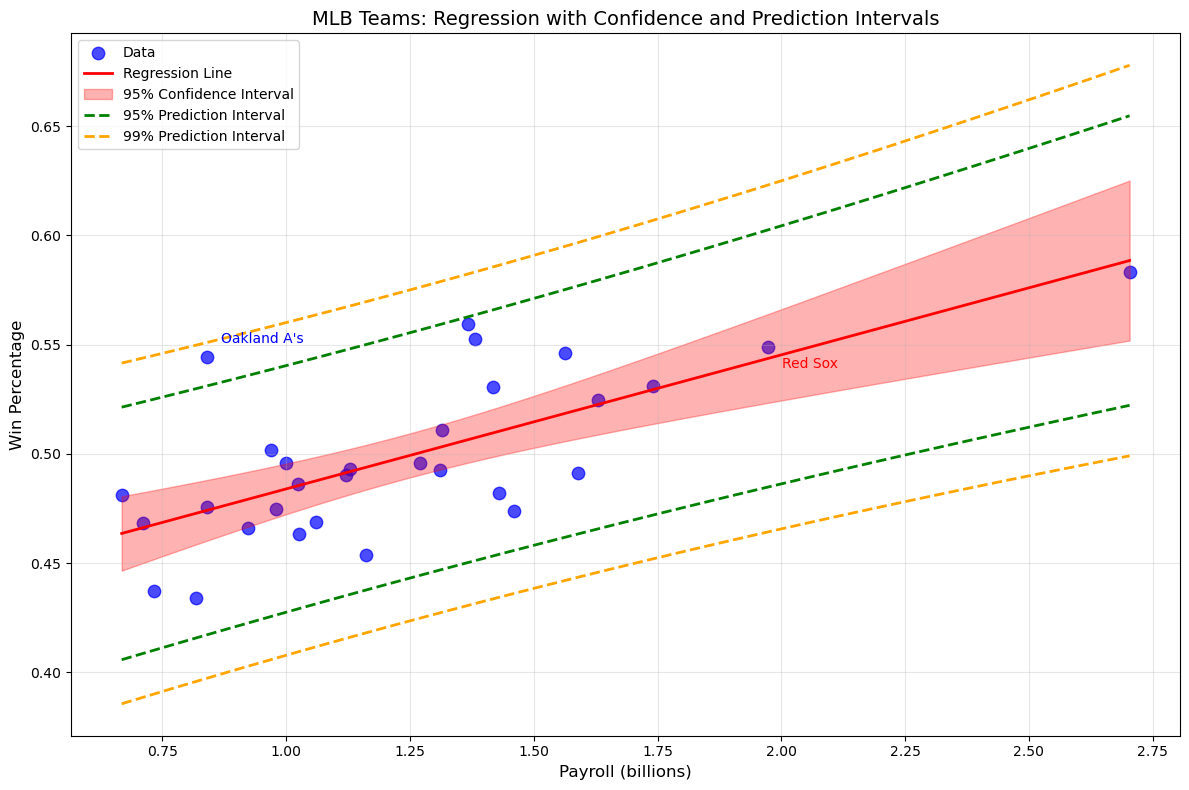

In [74]:
# Visualize confidence and prediction intervals
fig, ax = plt.subplots(figsize=(12, 8))

# Create range of payroll values for smooth curves
payroll_range = np.linspace(datapay['payroll'].min(), datapay['payroll'].max(), 100)

# Calculate intervals for each payroll value
ci_lowers = []
ci_uppers = []
pi_lowers_95 = []
pi_uppers_95 = []
pi_lowers_99 = []
pi_uppers_99 = []
predictions = []

for payroll in payroll_range:
    pred, _, ci_l, ci_u = confidence_interval_mean(payroll)
    _, _, pi_l_95, pi_u_95 = prediction_interval(payroll, 0.95)
    _, _, pi_l_99, pi_u_99 = prediction_interval(payroll, 0.99)

    predictions.append(pred)
    ci_lowers.append(ci_l)
    ci_uppers.append(ci_u)
    pi_lowers_95.append(pi_l_95)
    pi_uppers_95.append(pi_u_95)
    pi_lowers_99.append(pi_l_99)
    pi_uppers_99.append(pi_u_99)

# Plot the data points
ax.scatter(datapay['payroll'], datapay['win'], alpha=0.7, s=80, color='blue', label='Data')

# Plot regression line
ax.plot(payroll_range, predictions, color='red', linewidth=2, label='Regression Line')

# Plot confidence interval (shaded)
ax.fill_between(payroll_range, ci_lowers, ci_uppers, alpha=0.3, color='red', label='95% Confidence Interval')

# Plot prediction intervals (lines)
ax.plot(payroll_range, pi_lowers_95, '--', color='green', linewidth=2, label='95% Prediction Interval')
ax.plot(payroll_range, pi_uppers_95, '--', color='green', linewidth=2)
ax.plot(payroll_range, pi_lowers_99, '--', color='orange', linewidth=2, label='99% Prediction Interval')
ax.plot(payroll_range, pi_uppers_99, '--', color='orange', linewidth=2)

# Highlight specific teams
oakland_idx = datapay[datapay['team'].str.contains('Oakland', na=False)].index
redsox_idx = datapay[datapay['team'].str.contains('Red Sox', na=False)].index

if len(oakland_idx) > 0:
    ax.annotate("Oakland A's",
                (datapay.iloc[oakland_idx[0]]['payroll'], datapay.iloc[oakland_idx[0]]['win']),
                xytext=(10, 10), textcoords='offset points', fontsize=10, color='blue')

if len(redsox_idx) > 0:
    ax.annotate("Red Sox",
                (datapay.iloc[redsox_idx[0]]['payroll'], datapay.iloc[redsox_idx[0]]['win']),
                xytext=(10, -15), textcoords='offset points', fontsize=10, color='red')

ax.set_xlabel('Payroll (billions)', fontsize=12)
ax.set_ylabel('Win Percentage', fontsize=12)
ax.set_title('MLB Teams: Regression with Confidence and Prediction Intervals', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This comprehensive plot shows the regression line along with both confidence and prediction intervals. The shaded red area represents the 95% confidence interval for the mean response - this is where we expect the average team with a given payroll to perform. The dashed lines show prediction intervals for individual teams. The 95% prediction interval (green dashed lines) is wider than the confidence interval, and the 99% prediction interval (orange dashed lines) is wider still. This visualization clearly shows the difference between predicting average performance versus individual team performance.

From our output above, the 95% prediction interval varies from .41 to .53 for a team like the Oakland A's. But its win is .54. So it is somewhat unusual but not that unusual! The 99% prediction interval contains the true Oakland winning percentage of 0.545.

**Important distinction:** Confidence intervals tell us about the mean response, while prediction intervals tell us about individual responses. This is a crucial difference in statistical interpretation.

### 2.4 Model diagnoses

How reliable our confidence intervals and the tests are? We will need to check the model assumptions in the following steps:

1. Check linearity first; if linearity is satisfied, then
2. Check homoscedasticity; if homoscedasticity is satisfied, then  
3. Check normality.

#### 2.4.1 Residual plot

We plot the residuals against the fitted values to:
- check linearity by checking whether the residuals follow a symmetric pattern with respect to h = 0.
- check homoscedasticity by checking whether the residuals are evenly distributed within a band.

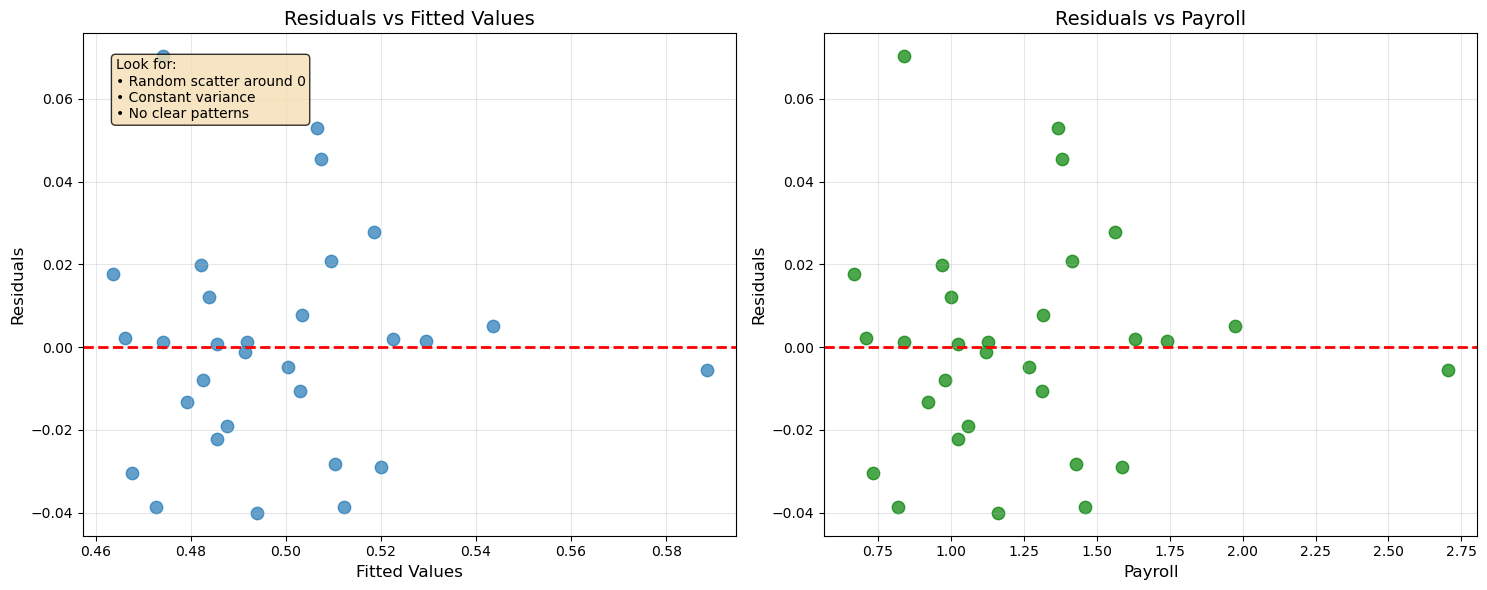

Residual Analysis:
Mean of residuals: 0.000000 (should be ~0)
Standard deviation of residuals: 0.0265
Min residual: -0.0400
Max residual: 0.0703


In [75]:
# Create residual plots for model diagnostics
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Residuals vs Fitted Values
axes[0].scatter(y_pred, residuals, alpha=0.7, s=80)
axes[0].axhline(y=0, color='red', linewidth=2, linestyle='--')  # Reference line at y=0
axes[0].set_xlabel('Fitted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Residuals vs Fitted Values', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Add some interpretation text
axes[0].text(0.05, 0.95, 'Look for:\n• Random scatter around 0\n• Constant variance\n• No clear patterns',
            transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 2. Residuals vs Payroll (original x variable)
axes[1].scatter(datapay['payroll'], residuals, alpha=0.7, s=80, color='green')
axes[1].axhline(y=0, color='red', linewidth=2, linestyle='--')
axes[1].set_xlabel('Payroll', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residuals vs Payroll', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate some residual statistics
print("Residual Analysis:")
print("=" * 20)
print(f"Mean of residuals: {residuals.mean():.6f} (should be ~0)")
print(f"Standard deviation of residuals: {residuals.std():.4f}")
print(f"Min residual: {residuals.min():.4f}")
print(f"Max residual: {residuals.max():.4f}")

Residual plots are crucial for checking our model assumptions. In the first plot (Residuals vs Fitted Values), we want to see random scatter around the horizontal line at zero with no clear patterns. Patterns might indicate non-linearity, while fanning out or fanning in suggests heteroscedasticity (non-constant variance). The second plot (Residuals vs Payroll) helps us see if there are patterns related to our predictor variable. The mean of residuals should be essentially zero (due to the least squares property), and the residuals should be roughly symmetrically distributed around zero.

#### 2.4.2 Check normality

We look at the qqplot of residuals to check normality.

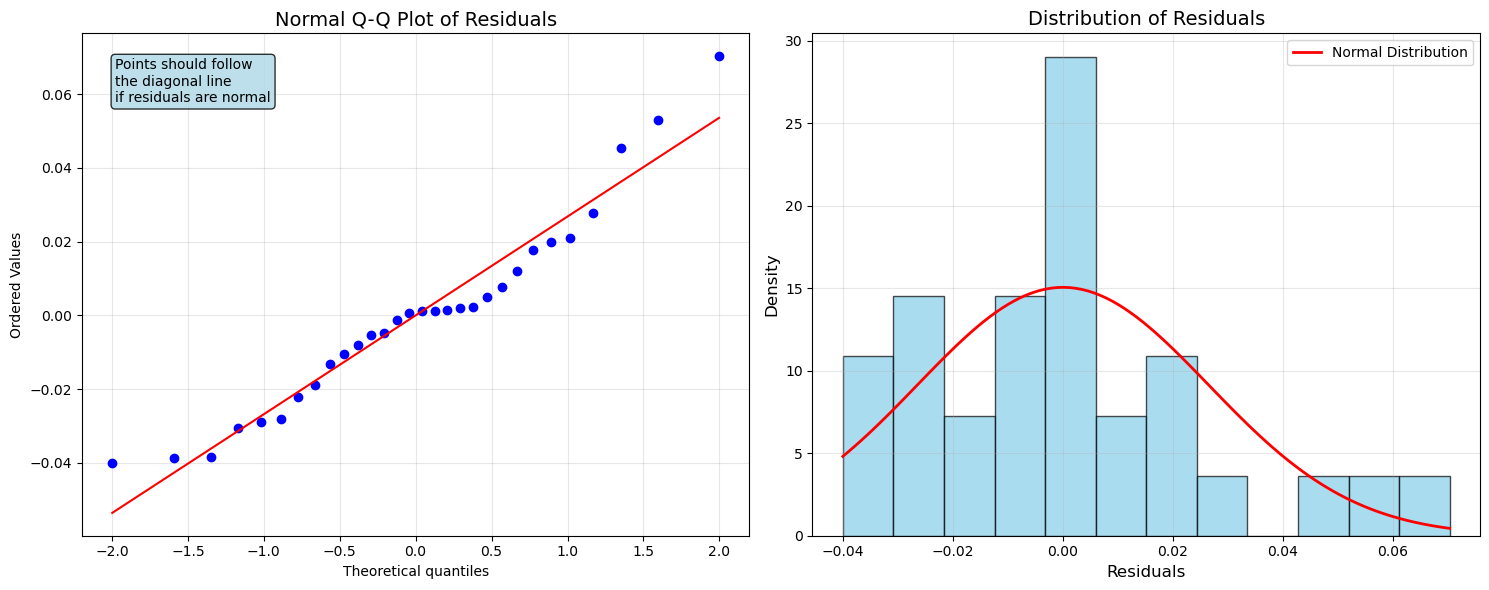

Normality Tests:
Shapiro-Wilk test:
  Statistic: 0.9474
  P-value: 0.1443
  Interpretation: Residuals appear normal

Anderson-Darling test:
  Statistic: 0.4915
  Critical values: [0.521 0.593 0.712 0.83  0.988]
  Significance levels: [15.  10.   5.   2.5  1. ]


In [76]:
# Check normality of residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Q-Q Plot (Quantile-Quantile plot)
stats.probplot(residuals, dist="norm", plot=axes[0])
axes[0].set_title('Normal Q-Q Plot of Residuals', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, 'Points should follow\nthe diagonal line\nif residuals are normal',
            transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# 2. Histogram of residuals
axes[1].hist(residuals, bins=12, alpha=0.7, color='skyblue', edgecolor='black', density=True)
axes[1].set_xlabel('Residuals', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Distribution of Residuals', fontsize=14)
axes[1].grid(True, alpha=0.3)

# Overlay normal curve for comparison
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
y_norm = stats.norm.pdf(x_norm, residuals.mean(), residuals.std())
axes[1].plot(x_norm, y_norm, 'red', linewidth=2, label='Normal Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

# Formal tests for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals)  # Shapiro-Wilk test
anderson_stat = stats.anderson(residuals, dist='norm')  # Anderson-Darling test

print("Normality Tests:")
print("=" * 20)
print(f"Shapiro-Wilk test:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  P-value: {shapiro_p:.4f}")
print(f"  Interpretation: {'Residuals appear normal' if shapiro_p > 0.05 else 'Evidence against normality'}")

print(f"\nAnderson-Darling test:")
print(f"  Statistic: {anderson_stat.statistic:.4f}")
print(f"  Critical values: {anderson_stat.critical_values}")
print(f"  Significance levels: {anderson_stat.significance_level}")

The Q-Q plot compares the quantiles of our residuals to what we'd expect from a normal distribution. If the residuals are normally distributed, the points should roughly follow the diagonal line. Significant deviations suggest non-normality. The histogram with overlaid normal curve provides another visual check. The Shapiro-Wilk test formally tests the null hypothesis that the residuals are normally distributed - p-values less than 0.05 suggest evidence against normality. These diagnostics help us determine whether our statistical inferences (confidence intervals, p-values) are reliable.

## Summary

- **EDA:** We understand the data by exploring the basic structure of the data (number of observations, variables and missing data), the descriptive statistics and the relationship between variables. Visualization is a crucial step for EDA. Both graphical tools in matplotlib and seaborn come in handy.

- **OLS:** Simple linear regression is introduced. We study the OLS estimate with its interpretation and properties. We evaluate the OLS estimate and provide inference. It is important to perform model diagnoses before coming to any conclusion. The `LinearRegression()` function is one of the most important tools for data scientists.

## Appendices

We have put a few topics here. Some of the sections might be covered in the class.

### Appendix 1: Reverse Regression

Now we understand more about regression method. If one wants to predict payroll using win as predictor can we solve for payroll using the LS equation above to predict payroll?

The answer is NO, and why not? We first plot our original model:

ŷ_win = 0.42260 + 0.06137 · x_payroll

In [77]:
# Demonstrate reverse regression issue
print("Original Model: win = β₀ + β₁ × payroll")
print(f"win = {b0:.5f} + {b1:.5f} × payroll")
print()

# Now fit the reverse regression: payroll = β₀ + β₁ × win
X_reverse = datapay[['win']]  # win as predictor
y_reverse = datapay['payroll']  # payroll as response

myfit_reverse = LinearRegression()
myfit_reverse.fit(X_reverse, y_reverse)

b0_reverse = myfit_reverse.intercept_
b1_reverse = myfit_reverse.coef_[0]

print("Reverse Model: payroll = β₀ + β₁ × win")
print(f"payroll = {b0_reverse:.5f} + {b1_reverse:.5f} × win")
print()

# What if we solve the original equation for payroll?
# win = b0 + b1 * payroll  =>  payroll = (win - b0) / b1
print("If we algebraically solve original equation for payroll:")
print(f"payroll = (win - {b0:.5f}) / {b1:.5f}")
print(f"payroll = {-b0/b1:.5f} + {1/b1:.5f} × win")

print(f"\nComparison:")
print(f"Reverse regression:    payroll = {b0_reverse:.5f} + {b1_reverse:.5f} × win")
print(f"Algebraic solution:    payroll = {-b0/b1:.5f} + {1/b1:.5f} × win")
print(f"Are they the same? {np.allclose([b0_reverse, b1_reverse], [-b0/b1, 1/b1])}")

Original Model: win = β₀ + β₁ × payroll
win = 0.42260 + 0.06137 × payroll

Reverse Model: payroll = β₀ + β₁ × win
payroll = -2.77842 + 8.05629 × win

If we algebraically solve original equation for payroll:
payroll = (win - 0.42260) / 0.06137
payroll = -6.88624 + 16.29502 × win

Comparison:
Reverse regression:    payroll = -2.77842 + 8.05629 × win
Algebraic solution:    payroll = -6.88624 + 16.29502 × win
Are they the same? False


This demonstrates a fundamental principle: regression is not symmetric! When we reverse the roles of x and y, we get a different line than if we algebraically solve our original equation. This happens because least squares minimizes the sum of squared vertical distances (residuals), but the "vertical" direction changes when we swap variables. The reverse regression minimizes errors in the payroll direction, while solving the original equation assumes no error in the win direction. This is why we must be careful about which variable we treat as the predictor and which as the response.

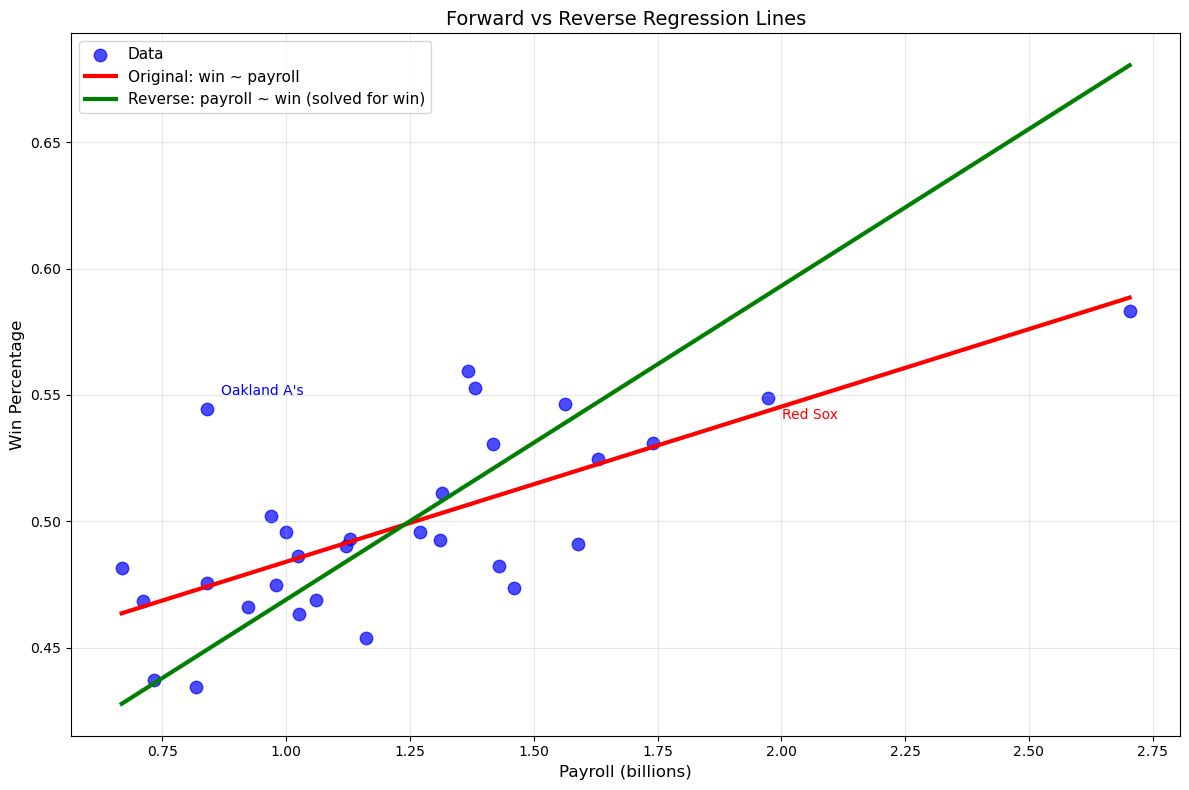

Conclusion: The two lines are NOT the same!
This is because least squares minimizes vertical distances to the line,
and 'vertical' means different things depending on which variable is on the y-axis.


In [78]:
# Visualize the difference between forward and reverse regression
plt.figure(figsize=(12, 8))

# Plot data points
plt.scatter(datapay['payroll'], datapay['win'], alpha=0.7, s=80, color='blue', label='Data')

# Plot original regression line (win vs payroll)
payroll_range = np.linspace(datapay['payroll'].min(), datapay['payroll'].max(), 100)
win_predicted = b0 + b1 * payroll_range
plt.plot(payroll_range, win_predicted, 'red', linewidth=3, label='Original: win ~ payroll')

# Plot reverse regression line (solve for win from payroll ~ win regression)
win_for_reverse = (payroll_range - b0_reverse) / b1_reverse
plt.plot(payroll_range, win_for_reverse, 'green', linewidth=3, label='Reverse: payroll ~ win (solved for win)')

# Highlight specific teams
oakland_idx = datapay[datapay['team'].str.contains('Oakland', na=False)].index
redsox_idx = datapay[datapay['team'].str.contains('Red Sox', na=False)].index

if len(oakland_idx) > 0:
    plt.annotate("Oakland A's",
                (datapay.iloc[oakland_idx[0]]['payroll'], datapay.iloc[oakland_idx[0]]['win']),
                xytext=(10, 10), textcoords='offset points', fontsize=10, color='blue')

if len(redsox_idx) > 0:
    plt.annotate("Red Sox",
                (datapay.iloc[redsox_idx[0]]['payroll'], datapay.iloc[redsox_idx[0]]['win']),
                xytext=(10, -15), textcoords='offset points', fontsize=10, color='red')

plt.xlabel('Payroll (billions)', fontsize=12)
plt.ylabel('Win Percentage', fontsize=12)
plt.title('Forward vs Reverse Regression Lines', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Conclusion: The two lines are NOT the same!")
print("This is because least squares minimizes vertical distances to the line,")
print("and 'vertical' means different things depending on which variable is on the y-axis.")

The visualization clearly shows that the two regression lines are different. This has important practical implications. If we want to predict how much a team should spend to achieve a certain win percentage, we need to be careful about which regression equation to use. The choice depends on which direction of prediction makes more sense for our specific question and which variable we consider to have measurement error or natural variation.

### Appendix 2: t-distribution vs Normal distribution

Difference between normal (z) and t-distribution with df = n. The distribution of z is similar to that of t when degrees of freedom are large, say 30 or more.

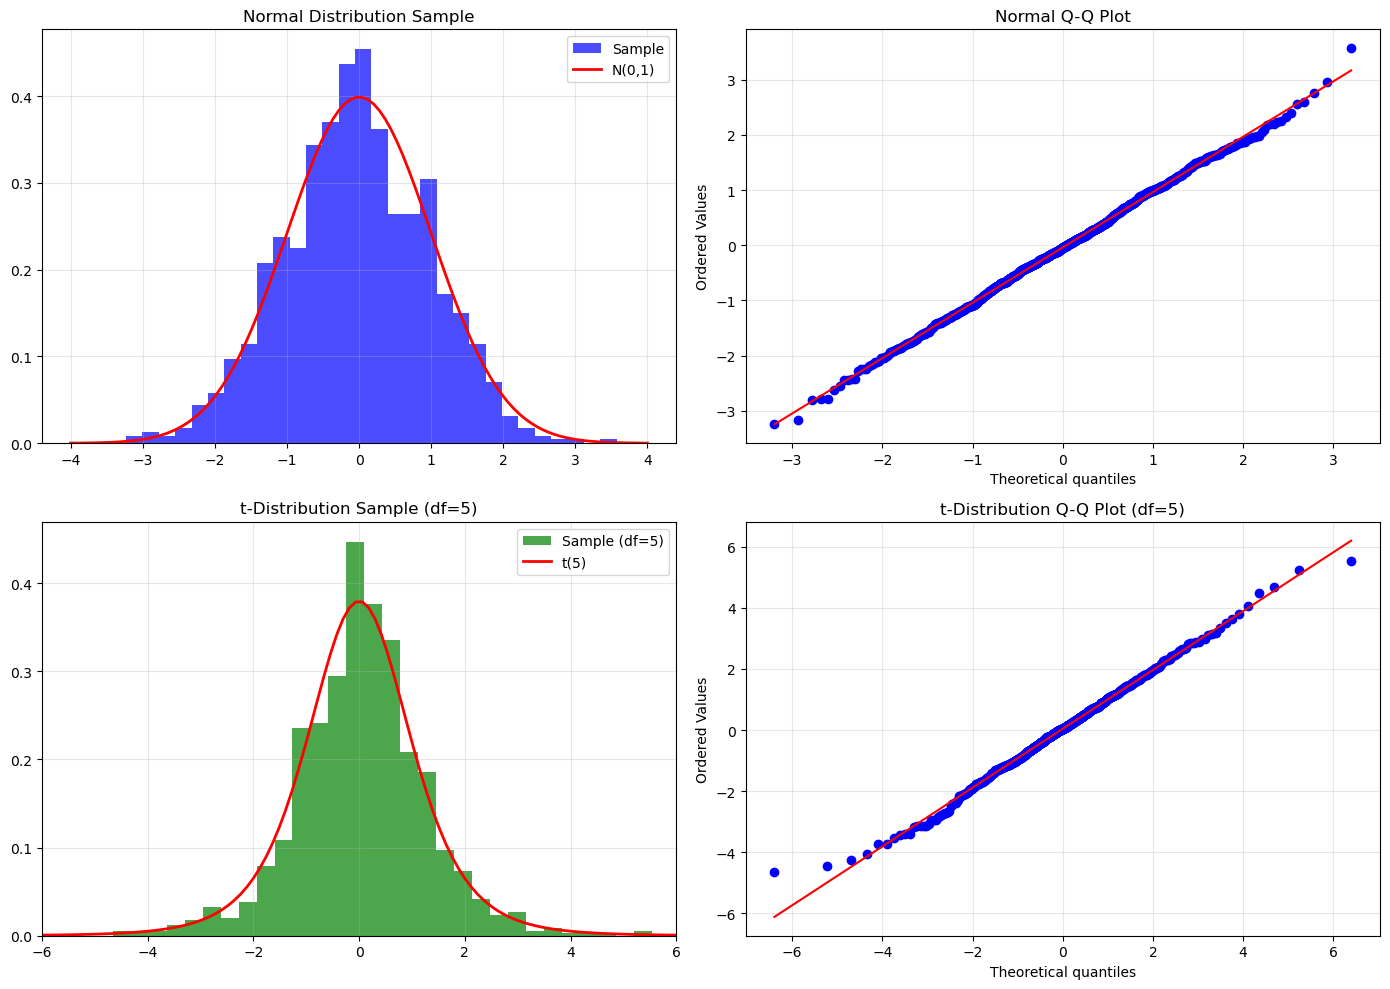

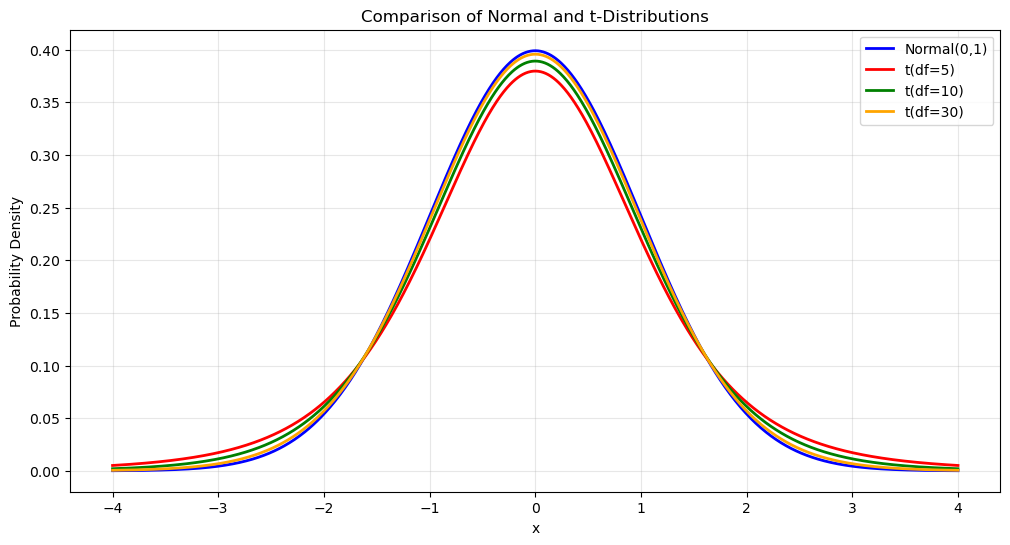

Key differences:
- t-distribution has heavier tails (more extreme values)
- As degrees of freedom increase, t-distribution approaches normal
- For small samples (small df), t-distribution accounts for additional uncertainty


In [79]:
# Compare normal and t-distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Generate normal random sample
np.random.seed(123)
z_sample = np.random.normal(0, 1, 1000)

# Plot 1: Normal distribution histogram and Q-Q plot
axes[0,0].hist(z_sample, bins=30, density=True, alpha=0.7, color='blue', label='Sample')
x_norm = np.linspace(-4, 4, 100)
axes[0,0].plot(x_norm, stats.norm.pdf(x_norm), 'red', linewidth=2, label='N(0,1)')
axes[0,0].set_title('Normal Distribution Sample')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

stats.probplot(z_sample, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Normal Q-Q Plot')
axes[0,1].grid(True, alpha=0.3)

# Generate t-distribution sample with small degrees of freedom
df_small = 5
t_sample = np.random.standard_t(df_small, 1000)

# Plot 2: t-distribution with df=5
axes[1,0].hist(t_sample, bins=30, density=True, alpha=0.7, color='green',
              label=f'Sample (df={df_small})')
x_t = np.linspace(-6, 6, 100)
axes[1,0].plot(x_t, stats.t.pdf(x_t, df_small), 'red', linewidth=2,
              label=f't({df_small})')
axes[1,0].set_title(f't-Distribution Sample (df={df_small})')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xlim(-6, 6)

stats.probplot(t_sample, dist="t", sparams=(df_small,), plot=axes[1,1])
axes[1,1].set_title(f't-Distribution Q-Q Plot (df={df_small})')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare probability density functions
plt.figure(figsize=(12, 6))
x = np.linspace(-4, 4, 1000)

plt.plot(x, stats.norm.pdf(x), 'blue', linewidth=2, label='Normal(0,1)')
plt.plot(x, stats.t.pdf(x, df=5), 'red', linewidth=2, label='t(df=5)')
plt.plot(x, stats.t.pdf(x, df=10), 'green', linewidth=2, label='t(df=10)')
plt.plot(x, stats.t.pdf(x, df=30), 'orange', linewidth=2, label='t(df=30)')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Comparison of Normal and t-Distributions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Key differences:")
print("- t-distribution has heavier tails (more extreme values)")
print("- As degrees of freedom increase, t-distribution approaches normal")
print("- For small samples (small df), t-distribution accounts for additional uncertainty")

The t-distribution is used instead of the normal distribution when we have small samples and unknown population variance. The key differences are that the t-distribution has heavier tails (allowing for more extreme values) and becomes more similar to the normal distribution as the degrees of freedom increase. In regression, we use the t-distribution for inference because we estimate the error variance from our sample. For large samples (typically n > 30), the difference becomes negligible, but for smaller samples like our baseball data (n=30), using the t-distribution gives more conservative (wider) confidence intervals and higher p-values.

### Appendix 3: Investigate R-Squared

#### Case I: Non-linear response

A perfect model between X and Y but it is not linear. Let's see what R² looks like when y = x³ with no noise!

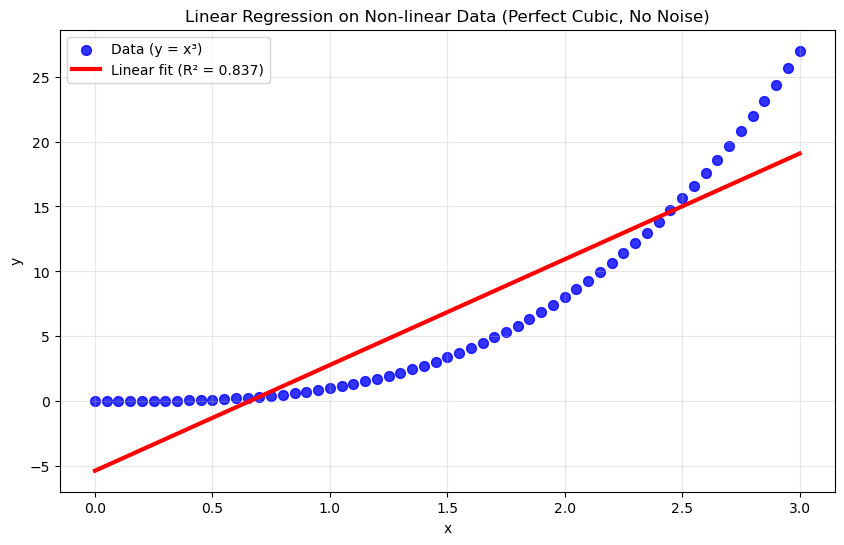

Non-linear case: R² = 0.837
Even with a perfect relationship, R² is not 1.0 because the relationship is not linear!


In [80]:
# Case I: Perfect non-linear relationship
x_nonlinear = np.linspace(0, 3, 61)  # 61 points from 0 to 3
y_nonlinear = x_nonlinear**3  # Perfect cubic relationship, no noise

# Fit linear regression to non-linear data
X_nl = x_nonlinear.reshape(-1, 1)  # Reshape for sklearn
model_nl = LinearRegression()
model_nl.fit(X_nl, y_nonlinear)
y_pred_nl = model_nl.predict(X_nl)
r2_nl = r2_score(y_nonlinear, y_pred_nl)

# Plot the non-linear case
plt.figure(figsize=(10, 6))
plt.scatter(x_nonlinear, y_nonlinear, alpha=0.8, s=50, color='blue', label='Data (y = x³)')
plt.plot(x_nonlinear, y_pred_nl, 'red', linewidth=3, label=f'Linear fit (R² = {r2_nl:.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression on Non-linear Data (Perfect Cubic, No Noise)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Non-linear case: R² = {r2_nl:.3f}")
print("Even with a perfect relationship, R² is not 1.0 because the relationship is not linear!")

This example shows a crucial limitation of R². Even though there's a perfect relationship between x and y (y = x³ exactly), the R² is much less than 1.0 because we're fitting a linear model to non-linear data. This demonstrates that R² measures how well a linear model fits the data, not how strong the overall relationship is. If we fitted a cubic polynomial instead of a line, we would get R² = 1.0. This is why examining residual plots is important - they can reveal non-linear patterns that R² alone might miss.

#### Case II: Large variance vs small variance  

A perfect linear model between X and Y but with noise: y = 2 + 3x + ε, where ε ~ N(0,σ²). Let's see how R² changes with different noise levels.

Effect of Noise on R²:
Noise σ = 3.0: R² = 0.485, β̂₀ =  1.55, β̂₁ = 3.13
Noise σ = 1.0: R² = 0.873, β̂₀ =  2.11, β̂₁ = 2.92
Noise σ = 0.5: R² = 0.964, β̂₀ =  1.94, β̂₁ = 3.02
Noise σ = 0.1: R² = 0.999, β̂₀ =  1.97, β̂₁ = 3.01


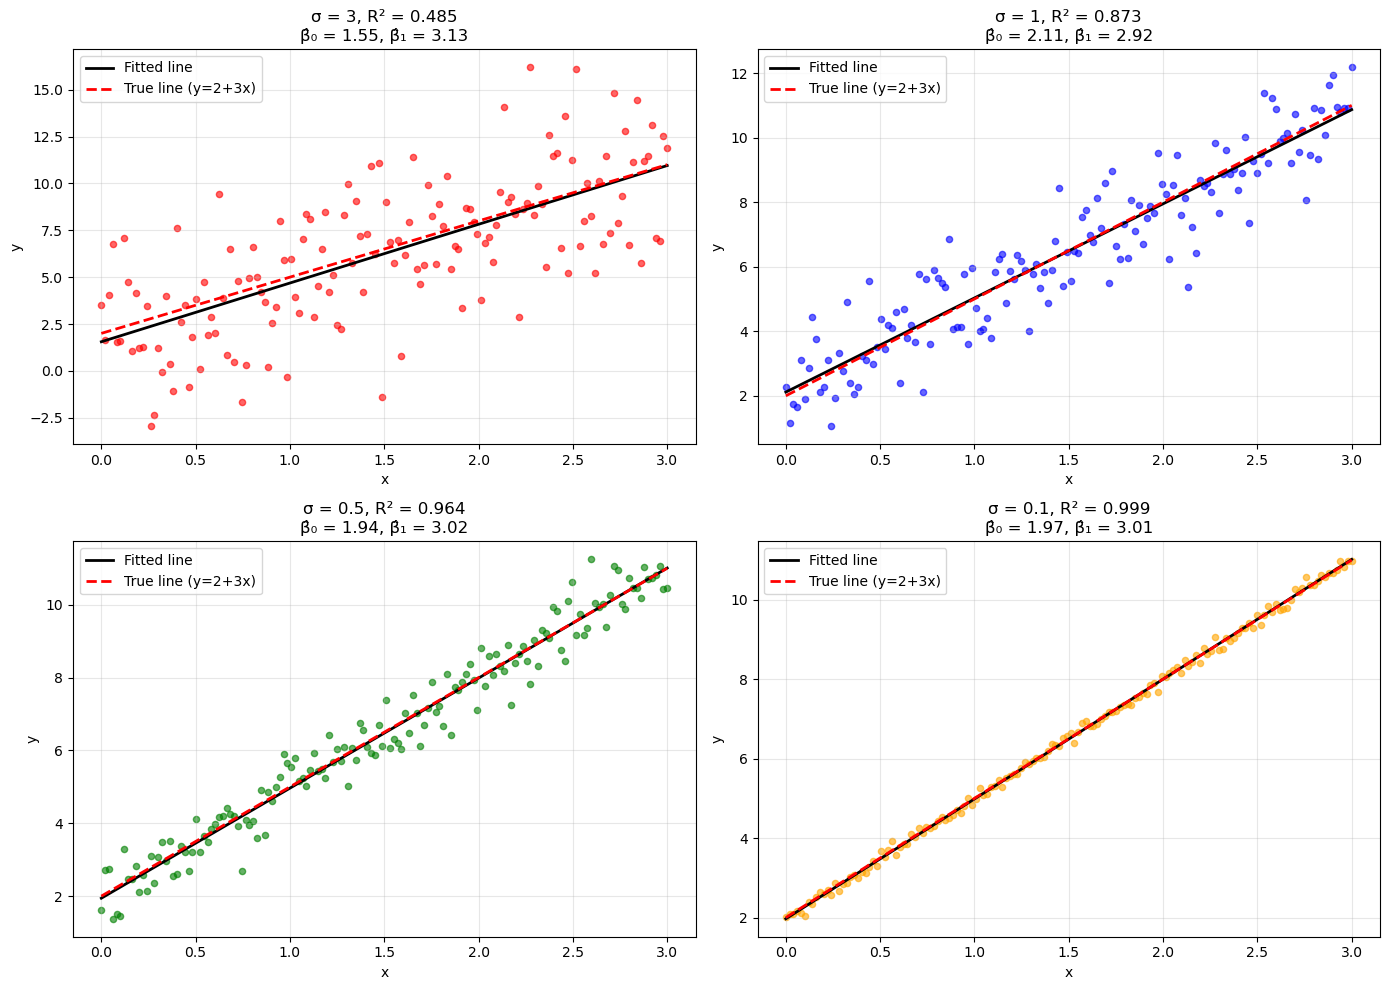


Key insights:
- Lower noise (smaller σ) → Higher R²
- All models have the same true linear relationship
- Estimates vary around true values (β₀=2, β₁=3) due to noise
- R² reflects signal-to-noise ratio, not just relationship strength


In [81]:
# Case II: Linear model with different noise levels
np.random.seed(42)  # For reproducible results
x_linear = np.linspace(0, 3, 150)  # 150 points from 0 to 3

# Create subplots for different noise levels
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Different noise levels (standard deviations)
noise_levels = [3, 1, 0.5, 0.1]
colors = ['red', 'blue', 'green', 'orange']

print("Effect of Noise on R²:")
print("=" * 30)

for i, (noise_std, color) in enumerate(zip(noise_levels, colors)):
    # Generate data with different noise levels
    np.random.seed(42 + i)  # Different seed for each subplot
    noise = np.random.normal(0, noise_std, len(x_linear))
    y_with_noise = 2 + 3 * x_linear + noise  # True model: y = 2 + 3x + ε

    # Fit linear regression
    X_noise = x_linear.reshape(-1, 1)
    model_noise = LinearRegression()
    model_noise.fit(X_noise, y_with_noise)
    y_pred_noise = model_noise.predict(X_noise)
    r2_noise = r2_score(y_with_noise, y_pred_noise)

    # Extract coefficients
    b0_noise = model_noise.intercept_
    b1_noise = model_noise.coef_[0]

    # Plot
    axes[i].scatter(x_linear, y_with_noise, alpha=0.6, s=20, color=color)
    axes[i].plot(x_linear, y_pred_noise, 'black', linewidth=2,
                label=f'Fitted line')
    axes[i].plot(x_linear, 2 + 3*x_linear, 'red', linewidth=2, linestyle='--',
                label='True line (y=2+3x)')

    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'σ = {noise_std}, R² = {r2_noise:.3f}\n'
                     f'β̂₀ = {b0_noise:.2f}, β̂₁ = {b1_noise:.2f}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

    print(f"Noise σ = {noise_std:3.1f}: R² = {r2_noise:.3f}, β̂₀ = {b0_noise:5.2f}, β̂₁ = {b1_noise:.2f}")

plt.tight_layout()
plt.show()

print("\nKey insights:")
print("- Lower noise (smaller σ) → Higher R²")
print("- All models have the same true linear relationship")
print("- Estimates vary around true values (β₀=2, β₁=3) due to noise")
print("- R² reflects signal-to-noise ratio, not just relationship strength")

This demonstration shows how R² depends on the signal-to-noise ratio in your data. All four plots show the same underlying linear relationship (y = 2 + 3x), but different amounts of random noise. With less noise, R² approaches 1.0 and our coefficient estimates are closer to the true values. With more noise, R² decreases and our estimates become more variable. This explains why R² alone isn't sufficient for model evaluation - a low R² might indicate either a weak relationship or a strong relationship with high noise levels.

### Appendix 4: More on Model Diagnoses

What do we expect to see even when all the model assumptions are met?
- a) Variability of the LS estimates β's
- b) Variability of the R²'s  
- c) Variability of the σ̂²'s
- d) Model diagnoses: through residuals

We demonstrate this through a simulation.

Here is a case that all the linear model assumptions are met. Everything can be checked by examining the residual plots.

Simulation: True model is y = 1 + 2x + ε, where ε ~ N(0, 4)


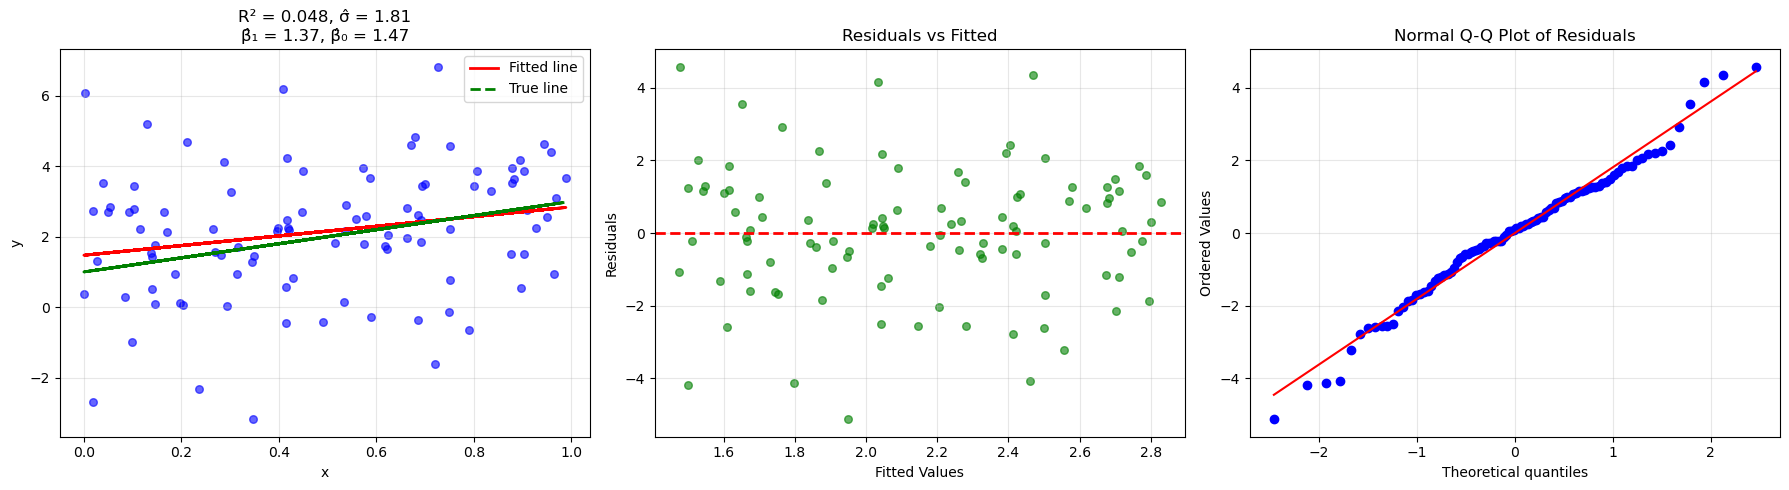

Single simulation results:
True values:      β₀ = 1, β₁ = 2, σ = 2
Estimated values: β̂₀ = 1.474, β̂₁ = 1.370, σ̂ = 1.807


In [82]:
# Simulation to show variability when assumptions are met
np.random.seed(1)
n_sim = 100  # Number of observations
x_sim = np.random.uniform(0, 1, n_sim)  # Fixed x values

# True parameters
true_beta0 = 1
true_beta1 = 2
true_sigma = 2

print("Simulation: True model is y = 1 + 2x + ε, where ε ~ N(0, 4)")
print("=" * 60)

# Single simulation example
y_sim = true_beta0 + true_beta1 * x_sim + np.random.normal(0, true_sigma, n_sim)

# Fit regression
X_sim = x_sim.reshape(-1, 1)
model_sim = LinearRegression()
model_sim.fit(X_sim, y_sim)
y_pred_sim = model_sim.predict(X_sim)

# Calculate statistics
b0_sim = model_sim.intercept_
b1_sim = model_sim.coef_[0]
r2_sim = r2_score(y_sim, y_pred_sim)
residuals_sim = y_sim - y_pred_sim
sigma_hat_sim = np.sqrt(np.sum(residuals_sim**2) / (n_sim - 2))

# Plot the simulation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Data and fitted line
axes[0].scatter(x_sim, y_sim, alpha=0.6, s=30, color='blue')
axes[0].plot(x_sim, y_pred_sim, 'red', linewidth=2, label='Fitted line')
axes[0].plot(x_sim, true_beta0 + true_beta1 * x_sim, 'green', linewidth=2,
            label='True line', linestyle='--')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title(f'R² = {r2_sim:.3f}, σ̂ = {sigma_hat_sim:.2f}\n'
                 f'β̂₁ = {b1_sim:.2f}, β̂₀ = {b0_sim:.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Residuals vs Fitted
axes[1].scatter(y_pred_sim, residuals_sim, alpha=0.6, s=30, color='green')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Fitted')
axes[1].grid(True, alpha=0.3)

# 3. Q-Q plot of residuals
stats.probplot(residuals_sim, dist="norm", plot=axes[2])
axes[2].set_title('Normal Q-Q Plot of Residuals')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Single simulation results:")
print(f"True values:      β₀ = {true_beta0}, β₁ = {true_beta1}, σ = {true_sigma}")
print(f"Estimated values: β̂₀ = {b0_sim:.3f}, β̂₁ = {b1_sim:.3f}, σ̂ = {sigma_hat_sim:.3f}")

This simulation demonstrates what we expect to see when all model assumptions are satisfied. The data follows the assumed linear model with normal errors, yet we still see variability in our estimates due to random sampling. The residual plot shows random scatter around zero (good), and the Q-Q plot shows points roughly following the diagonal line (indicating normality). Even under ideal conditions, our estimates will vary from sample to sample - this is why we need confidence intervals and hypothesis tests to quantify our uncertainty.

Running 100 simulations to show sampling variability...


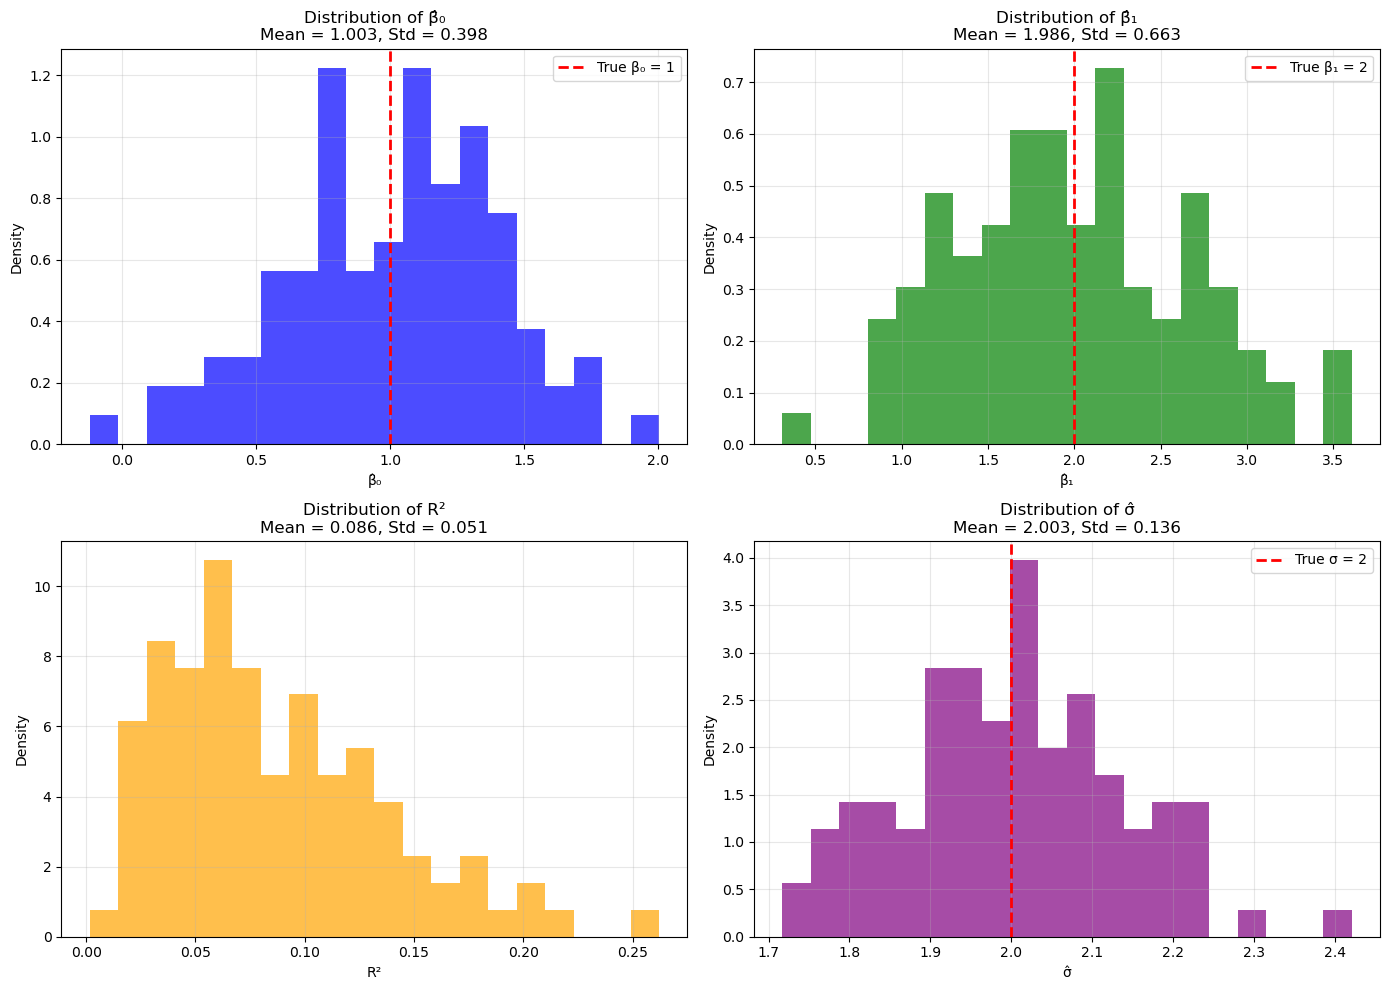

Simulation Summary:
True parameters: β₀ = 1, β₁ = 2, σ = 2
Estimated means: β̂₀ = 1.003, β̂₁ = 1.986, σ̂ = 2.003
Standard errors: SE(β̂₀) = 0.398, SE(β̂₁) = 0.663, SE(σ̂) = 0.136
R² statistics: Mean = 0.086, Range = [0.002, 0.262]

Key insights from simulation:
- Our estimates are unbiased (means ≈ true values)
- There is natural sampling variability around true parameters
- R² varies across samples even with the same underlying relationship
- This demonstrates why we need confidence intervals and hypothesis tests
- The theory says that β̂₁ ~ N(β₁ = 2, Var(β̂₁)). Our simulation confirms this.


In [83]:
# Multiple simulations to show sampling variability
n_simulations = 100
results = {
    'beta0': [],
    'beta1': [],
    'r2': [],
    'sigma': []
}

np.random.seed(42)
print("Running 100 simulations to show sampling variability...")

for i in range(n_simulations):
    # Generate new data each time (same x, new errors)
    y_sim_i = true_beta0 + true_beta1 * x_sim + np.random.normal(0, true_sigma, n_sim)

    # Fit model
    model_i = LinearRegression()
    model_i.fit(X_sim, y_sim_i)
    y_pred_i = model_i.predict(X_sim)

    # Store results
    results['beta0'].append(model_i.intercept_)
    results['beta1'].append(model_i.coef_[0])
    results['r2'].append(r2_score(y_sim_i, y_pred_i))

    residuals_i = y_sim_i - y_pred_i
    results['sigma'].append(np.sqrt(np.sum(residuals_i**2) / (n_sim - 2)))

# Convert to numpy arrays for analysis
results = {key: np.array(values) for key, values in results.items()}

# Create histograms of sampling distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# β₀ distribution
axes[0,0].hist(results['beta0'], bins=20, alpha=0.7, color='blue', density=True)
axes[0,0].axvline(true_beta0, color='red', linestyle='--', linewidth=2, label=f'True β₀ = {true_beta0}')
axes[0,0].set_xlabel('β̂₀')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title(f'Distribution of β̂₀\nMean = {results["beta0"].mean():.3f}, Std = {results["beta0"].std():.3f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# β₁ distribution
axes[0,1].hist(results['beta1'], bins=20, alpha=0.7, color='green', density=True)
axes[0,1].axvline(true_beta1, color='red', linestyle='--', linewidth=2, label=f'True β₁ = {true_beta1}')
axes[0,1].set_xlabel('β̂₁')
axes[0,1].set_ylabel('Density')
axes[0,1].set_title(f'Distribution of β̂₁\nMean = {results["beta1"].mean():.3f}, Std = {results["beta1"].std():.3f}')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# R² distribution
axes[1,0].hist(results['r2'], bins=20, alpha=0.7, color='orange', density=True)
axes[1,0].set_xlabel('R²')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title(f'Distribution of R²\nMean = {results["r2"].mean():.3f}, Std = {results["r2"].std():.3f}')
axes[1,0].grid(True, alpha=0.3)

# σ̂ distribution
axes[1,1].hist(results['sigma'], bins=20, alpha=0.7, color='purple', density=True)
axes[1,1].axvline(true_sigma, color='red', linestyle='--', linewidth=2, label=f'True σ = {true_sigma}')
axes[1,1].set_xlabel('σ̂')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title(f'Distribution of σ̂\nMean = {results["sigma"].mean():.3f}, Std = {results["sigma"].std():.3f}')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Simulation Summary:")
print("=" * 40)
print(f"True parameters: β₀ = {true_beta0}, β₁ = {true_beta1}, σ = {true_sigma}")
print(f"Estimated means: β̂₀ = {results['beta0'].mean():.3f}, β̂₁ = {results['beta1'].mean():.3f}, σ̂ = {results['sigma'].mean():.3f}")
print(f"Standard errors: SE(β̂₀) = {results['beta0'].std():.3f}, SE(β̂₁) = {results['beta1'].std():.3f}, SE(σ̂) = {results['sigma'].std():.3f}")
print(f"R² statistics: Mean = {results['r2'].mean():.3f}, Range = [{results['r2'].min():.3f}, {results['r2'].max():.3f}]")

print("\nKey insights from simulation:")
print("- Our estimates are unbiased (means ≈ true values)")
print("- There is natural sampling variability around true parameters")
print("- R² varies across samples even with the same underlying relationship")
print("- This demonstrates why we need confidence intervals and hypothesis tests")
print("- The theory says that β̂₁ ~ N(β₁ = 2, Var(β̂₁)). Our simulation confirms this.")

This simulation demonstrates the fundamental concept of sampling variability in statistics. Even when all our model assumptions are perfectly satisfied, our estimates will vary from sample to sample due to random error. The histograms show the sampling distributions of our estimators. Notice that the estimates are centered around the true parameter values (unbiased), but they have spread around those true values. This natural variability is exactly what statistical inference accounts for through standard errors, confidence intervals, and hypothesis tests.

The theory says that β̂₁ ~ N(β₁ = 2, Var(β̂₁)). Our simulation confirms this theoretical prediction - the distribution of β̂₁ is approximately normal and centered around the true value of 2.

### Appendix 5: Sample Statistics Review

We remind the readers of the definitions of sample statistics here, as they are fundamental to all regression calculations.

**Sample Mean:**
ȳ = (1/n) × Σᵢ₌₁ⁿ yᵢ

**Sample Variance:**
s² = Σᵢ₌₁ⁿ(yᵢ - ȳ)² / (n-1)

**Sample Standard Deviation:**
s = √[Σᵢ₌₁ⁿ(yᵢ - ȳ)² / (n-1)]

**Sample Correlation:**
r = Σᵢ₌₁ⁿ(xᵢ - x̄)(yᵢ - ȳ) / √[Σᵢ₌₁ⁿ(xᵢ - x̄)² × Σᵢ₌₁ⁿ(yᵢ - ȳ)²] = [Σᵢ₌₁ⁿ(xᵢ - x̄)(yᵢ - ȳ)] / (sₓ × sᵧ)

In [84]:
# Demonstrate sample statistics calculations and their Python implementations
print("Sample Statistics Calculations and Python Implementation:")
print("=" * 55)

# Create sample data for demonstration
np.random.seed(42)
n = 50
x_sample = np.random.normal(10, 2, n)  # Mean=10, SD=2
y_sample = 2 + 1.5 * x_sample + np.random.normal(0, 1, n)  # Linear relationship with noise

# Sample means
x_mean_manual = np.sum(x_sample) / n
x_mean_numpy = np.mean(x_sample)
x_mean_pandas = pd.Series(x_sample).mean()

print(f"Sample mean of x:")
print(f"  Manual calculation: Σxᵢ/n = {x_mean_manual:.4f}")
print(f"  Using np.mean(): {x_mean_numpy:.4f}")
print(f"  Using pandas: {x_mean_pandas:.4f}")

# Sample variance (using n-1 denominator for unbiased estimate)
x_var_manual = np.sum((x_sample - x_mean_manual)**2) / (n - 1)
x_var_numpy = np.var(x_sample, ddof=1)  # ddof=1 for unbiased estimate (n-1 denominator)
x_var_pandas = pd.Series(x_sample).var()

print(f"\nSample variance of x:")
print(f"  Manual calculation: Σ(xᵢ-x̄)²/(n-1) = {x_var_manual:.4f}")
print(f"  Using np.var(ddof=1): {x_var_numpy:.4f}")
print(f"  Using pandas: {x_var_pandas:.4f}")

# Sample standard deviation
x_std_manual = np.sqrt(x_var_manual)
x_std_numpy = np.std(x_sample, ddof=1)
x_std_pandas = pd.Series(x_sample).std()

print(f"\nSample standard deviation of x:")
print(f"  Manual calculation: √s² = {x_std_manual:.4f}")
print(f"  Using np.std(ddof=1): {x_std_numpy:.4f}")
print(f"  Using pandas: {x_std_pandas:.4f}")

# Sample correlation
x_mean = np.mean(x_sample)
y_mean = np.mean(y_sample)
numerator = np.sum((x_sample - x_mean) * (y_sample - y_mean))
denominator = np.sqrt(np.sum((x_sample - x_mean)**2) * np.sum((y_sample - y_mean)**2))
correlation_manual = numerator / denominator

correlation_numpy = np.corrcoef(x_sample, y_sample)[0, 1]  # Extract correlation from matrix
correlation_pandas = pd.Series(x_sample).corr(pd.Series(y_sample))

print(f"\nSample correlation between x and y:")
print(f"  Manual calculation: r = {correlation_manual:.4f}")
print(f"  Using np.corrcoef(): {correlation_numpy:.4f}")
print(f"  Using pandas: {correlation_pandas:.4f}")

# Create a comprehensive summary DataFrame
stats_summary = pd.DataFrame({
    'Variable': ['x_sample', 'y_sample'],
    'Mean': [np.mean(x_sample), np.mean(y_sample)],
    'Std Dev': [np.std(x_sample, ddof=1), np.std(y_sample, ddof=1)],
    'Variance': [np.var(x_sample, ddof=1), np.var(y_sample, ddof=1)],
    'Min': [np.min(x_sample), np.min(y_sample)],
    'Max': [np.max(x_sample), np.max(y_sample)]
})

print(f"\nComprehensive Summary Statistics:")
print(stats_summary.round(4))

Sample Statistics Calculations and Python Implementation:
Sample mean of x:
  Manual calculation: Σxᵢ/n = 9.5491
  Using np.mean(): 9.5491
  Using pandas: 9.5491

Sample variance of x:
  Manual calculation: Σ(xᵢ-x̄)²/(n-1) = 3.4869
  Using np.var(ddof=1): 3.4869
  Using pandas: 3.4869

Sample standard deviation of x:
  Manual calculation: √s² = 1.8673
  Using np.std(ddof=1): 1.8673
  Using pandas: 1.8673

Sample correlation between x and y:
  Manual calculation: r = 0.9578
  Using np.corrcoef(): 0.9578
  Using pandas: 0.9578

Comprehensive Summary Statistics:
   Variable     Mean  Std Dev  Variance      Min      Max
0  x_sample   9.5491   1.8673    3.4869   6.0807  13.7046
1  y_sample  16.3414   3.0248    9.1492  10.0640  22.9139


This demonstrates the fundamental sample statistics used throughout regression analysis. Key points to remember:

- **ddof=1**: In NumPy, we use `ddof=1` (delta degrees of freedom) to get the sample variance and standard deviation with (n-1) denominator, which gives us unbiased estimates
- **Manual vs Built-in**: Understanding the manual calculations helps us understand what the built-in functions are doing
- **Correlation**: Measures linear association and is crucial for understanding the relationship strength between variables

Note that `np.corrcoef()` returns a correlation matrix, so we extract the [0,1] element for the correlation between our two variables. These sample statistics form the foundation for all the regression calculations we've learned in this course.

## Summary

We've completed a comprehensive introduction to simple linear regression in Python. Here are the key takeaways:

**EDA:** We understand the data by exploring the basic structure of the data (number of observations, variables and missing data), the descriptive statistics and the relationship between variables. Visualization is a crucial step for EDA. Both graphical tools in matplotlib and seaborn come in handy.

**OLS:** Simple linear regression is introduced. We study the OLS estimate with its interpretation and properties. We evaluate the OLS estimate and provide inference. It is important to perform model diagnoses before coming to any conclusion. The `LinearRegression()` function from scikit-learn is one of the most important tools for data scientists.

**Statistical Inference:** Understanding the variability of the statistics and providing the accuracy of the estimators are key focuses for statisticians. We use confidence intervals and hypothesis tests to quantify uncertainty in our estimates.

**Model Diagnostics:** Always check your assumptions through residual plots and normality tests. Linear regression assumes linearity, homoscedasticity, and normality of errors.

**Python Implementation:** The tools we've learned - pandas for data manipulation, matplotlib and seaborn for visualization, scikit-learn for modeling, and scipy for statistical inference - form a powerful toolkit for regression analysis.